In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### Initial Sanity Test with test plot
Everything works fine, no need to run this section

In [3]:
# Get the current working directory
current_directory = os.getcwd()
# Go one step up from the current directory
parent_directory = os.path.dirname(current_directory)
print(parent_directory)
# Enter another directory inside the parent directory
target_directory = os.path.join(parent_directory, 'dataset', 'Ohio2018_processed', 'train')
print(target_directory)
# Check if the target directory exists
if os.path.exists(target_directory) and os.path.isdir(target_directory):
    print("The target directory exists.")
else:
    print("The target directory does not exist.")

C:\Users\julia\Desktop\Studium_MA5\DataDrivenDiabetesManagement\Project\git\DataDrivenDiabetesSemesterProject
C:\Users\julia\Desktop\Studium_MA5\DataDrivenDiabetesManagement\Project\git\DataDrivenDiabetesSemesterProject\dataset\Ohio2018_processed\train
The target directory exists.


In [4]:
# Enter file name 
file_name= "563-ws-training_processed.csv"
file_path = os.path.join(target_directory, file_name)
print(file_path)

C:\Users\julia\Desktop\Studium_MA5\DataDrivenDiabetesManagement\Project\git\DataDrivenDiabetesSemesterProject\dataset\Ohio2018_processed\train\563-ws-training_processed.csv


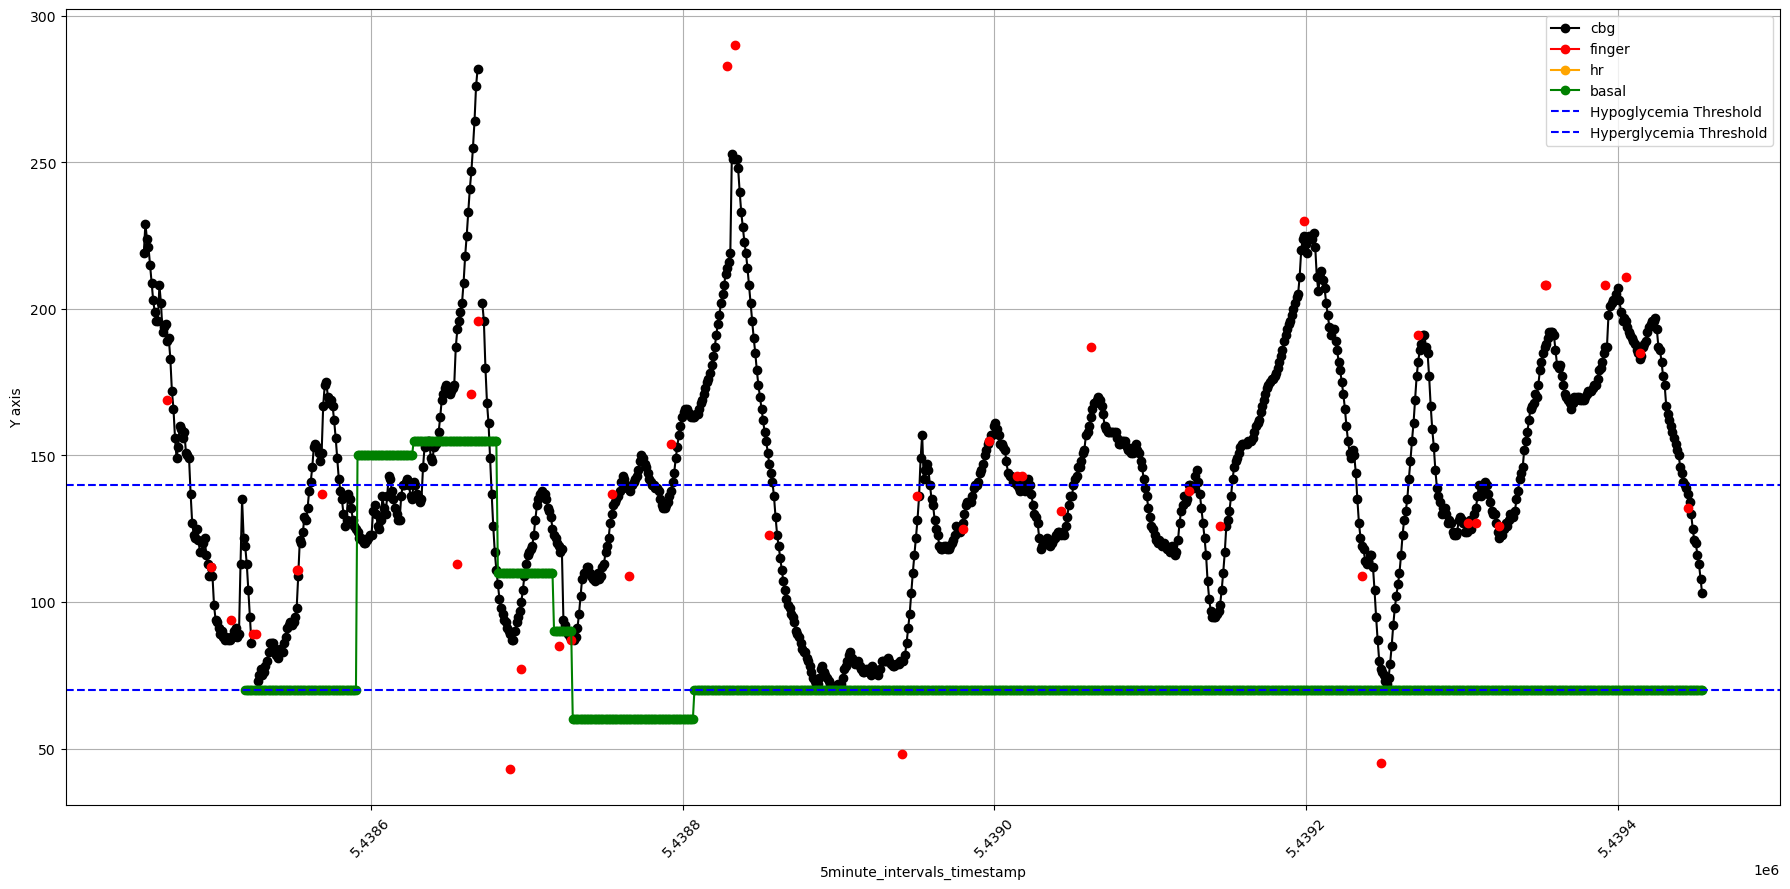

In [5]:
# Load specific patient excel path 
#file_path = r'C:\UniBern\DataDrivenDiabetes\Ohio_Data\Ohio2018_processed\train\563-ws-training_processed.csv'

# Load the CSV file into a pandas dataframe
df = pd.read_csv(file_path)

###################################### # code what you want in/out
# Filter rows where 'missing_cbg' is 0 (binary variable) -> this fills holes in cbg line
# filtered_df = df[df['missing_cbg'] == 0].head(1000)

# Or not, I still prefer only taking the first 1000 entries so I can see x,y relationship better
filtered_df = df.head(1000)
#####################################

# Plot lines
plt.figure(figsize=(18, 9))
plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['cbg'], marker='o', linestyle='-', color='black', label='cbg')
plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['finger'], marker='o', linestyle='-', color='red', label='finger')
plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['hr'], marker='o', linestyle='-', color='orange', label='hr')

#TODO ADD bolus data to plot 

# I multipled the basal by 100 just so its easier to see in plot
plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['basal']*100, marker='o', linestyle='-', color='green', label='basal')

# Variables that we can still plot and see what happens etc. -> hr, gsr, carbInput, bolus
# What I think they mean: hr>heart rate, gsr>Galvanic skin response, carbInput -> carb in grams?, 
# bolus> Insulin delivered to the patient, typically before a meal or when the patient is hyperglycemic.

# Horizontal line representing for hyper- and hypoglycemia, maybe it helps us see 
hypoglycemia_threshold = 70  # Not 100% sure about the value 
plt.axhline(y=hypoglycemia_threshold, color='blue', linestyle='--', label='Hypoglycemia Threshold')
hyperglycemia_threshold = 140 # Not 100% sure about the value 
plt.axhline(y=hyperglycemia_threshold, color='blue', linestyle='--', label='Hyperglycemia Threshold')

plt.xlabel('5minute_intervals_timestamp')
plt.ylabel('Y axis')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Load Dataset

In [6]:
# Path to the data folder

# Get the current working directory
current_directory = os.getcwd()

# Go one step up from the current directory
parent_directory = os.path.dirname(current_directory)

data_folder = os.path.join(parent_directory, 'dataset')
print(data_folder)

C:\Users\julia\Desktop\Studium_MA5\DataDrivenDiabetesManagement\Project\git\DataDrivenDiabetesSemesterProject\dataset


In [7]:
#data_folder = r'C:\Ohio_Data'

# List of patient excel IDs in the year folders
patient_ids_2018 = [559, 563, 570, 575, 588, 591]
patient_ids_2020 = [540, 544, 552, 567, 584, 596]

train_set_2018 = []
test_set_2018 = []
train_set_2020 = []
test_set_2020 = []

# not super pretty but works:
names_train_2018 = []
names_test_2018 = []
names_train_2020 = []
names_test_2020 = []

# For 2018 data
for patient_id in patient_ids_2018:
    for folder_type in ['training', 'testing']:
        file_name = f"{patient_id}-ws-{folder_type}_processed.csv"
        print(f"Load file: {file_name}")
        if folder_type == 'training':
            names_train_2018.append(file_name)
        else:
            names_test_2018.append(file_name)
        file_path = os.path.join(data_folder, 'Ohio2018_processed', folder_type[:-3], file_name)
        if os.path.exists(file_path): 
            patient_data = pd.read_csv(file_path)
            train_set_2018.append(patient_data) if folder_type == 'training' else test_set_2018.append(patient_data)
        else:
            print(f"File not found: {file_path}")
            raise FileNotFoundError("The target directory does not exist.")

# For 2020 data
for patient_id in patient_ids_2020:
    for folder_type in ['training', 'testing']:
        file_name = f"{patient_id}-ws-{folder_type}_processed.csv"
        print(f"Load file: {file_name}")
        if folder_type == 'training':
            names_train_2020.append(file_name)
        else:
            names_test_2020.append(file_name)
        file_path = os.path.join(data_folder, 'Ohio2020_processed', folder_type[:-3], file_name)
        if os.path.exists(file_path): 
            patient_data = pd.read_csv(file_path)
            train_set_2020.append(patient_data) if folder_type == 'training' else test_set_2020.append(patient_data)
        else:
            print(f"File not found: {file_path}")
            raise FileNotFoundError("The target directory does not exist.")

Load file: 559-ws-training_processed.csv
Load file: 559-ws-testing_processed.csv
Load file: 563-ws-training_processed.csv
Load file: 563-ws-testing_processed.csv
Load file: 570-ws-training_processed.csv
Load file: 570-ws-testing_processed.csv
Load file: 575-ws-training_processed.csv
Load file: 575-ws-testing_processed.csv
Load file: 588-ws-training_processed.csv
Load file: 588-ws-testing_processed.csv
Load file: 591-ws-training_processed.csv
Load file: 591-ws-testing_processed.csv
Load file: 540-ws-training_processed.csv
Load file: 540-ws-testing_processed.csv
Load file: 544-ws-training_processed.csv
Load file: 544-ws-testing_processed.csv
Load file: 552-ws-training_processed.csv
Load file: 552-ws-testing_processed.csv
Load file: 567-ws-training_processed.csv
Load file: 567-ws-testing_processed.csv
Load file: 584-ws-training_processed.csv
Load file: 584-ws-testing_processed.csv
Load file: 596-ws-training_processed.csv
Load file: 596-ws-testing_processed.csv


In [39]:
print(len(train_set_2018))
print(len(test_set_2018))
print(len(train_set_2020))
print(len(test_set_2020))

6
6
6
6


In [40]:
test = "training"
test[:-3]

'train'

Data: train_set_2018
Patient:  559-ws-training_processed.csv


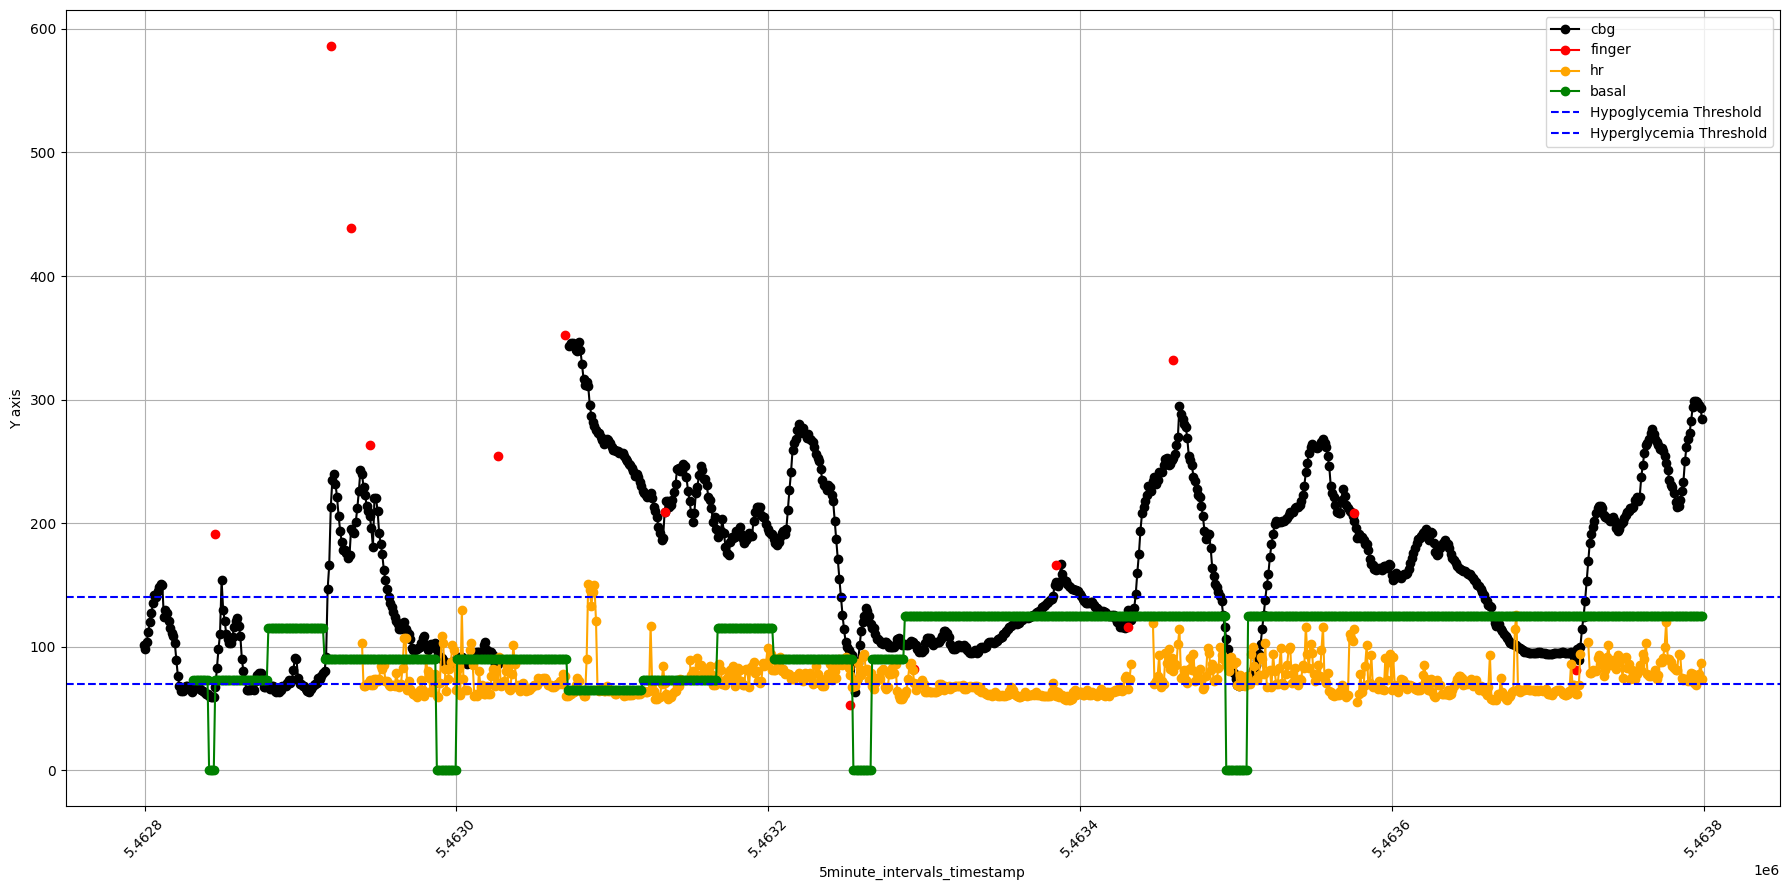

Patient:  563-ws-training_processed.csv


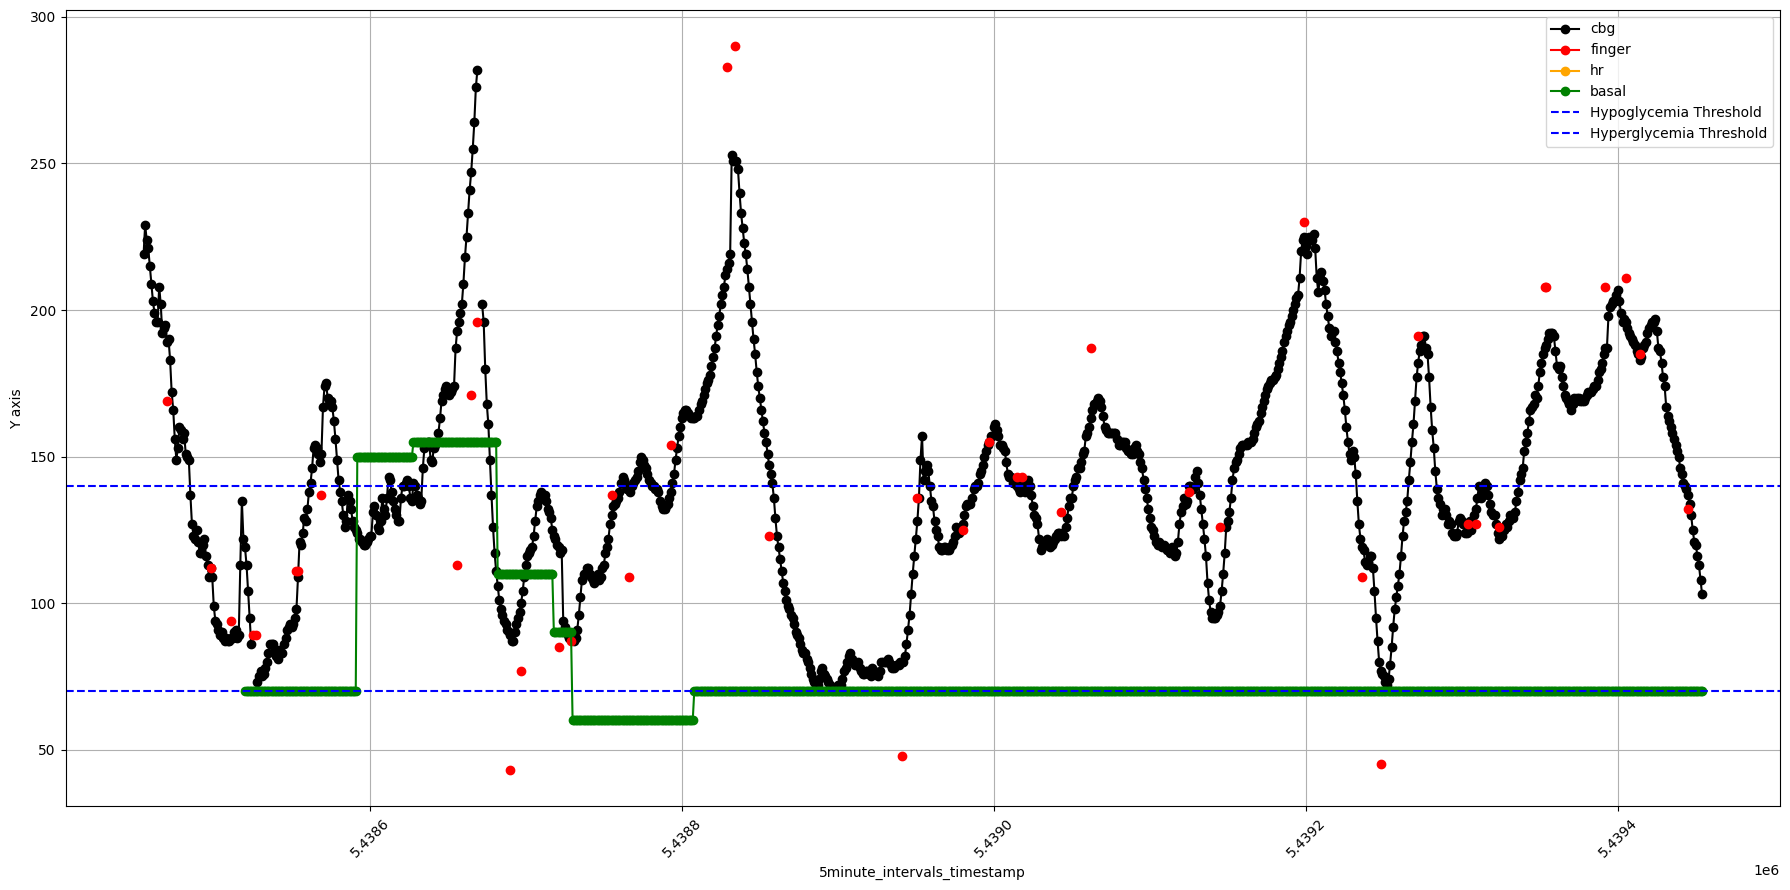

Patient:  570-ws-training_processed.csv


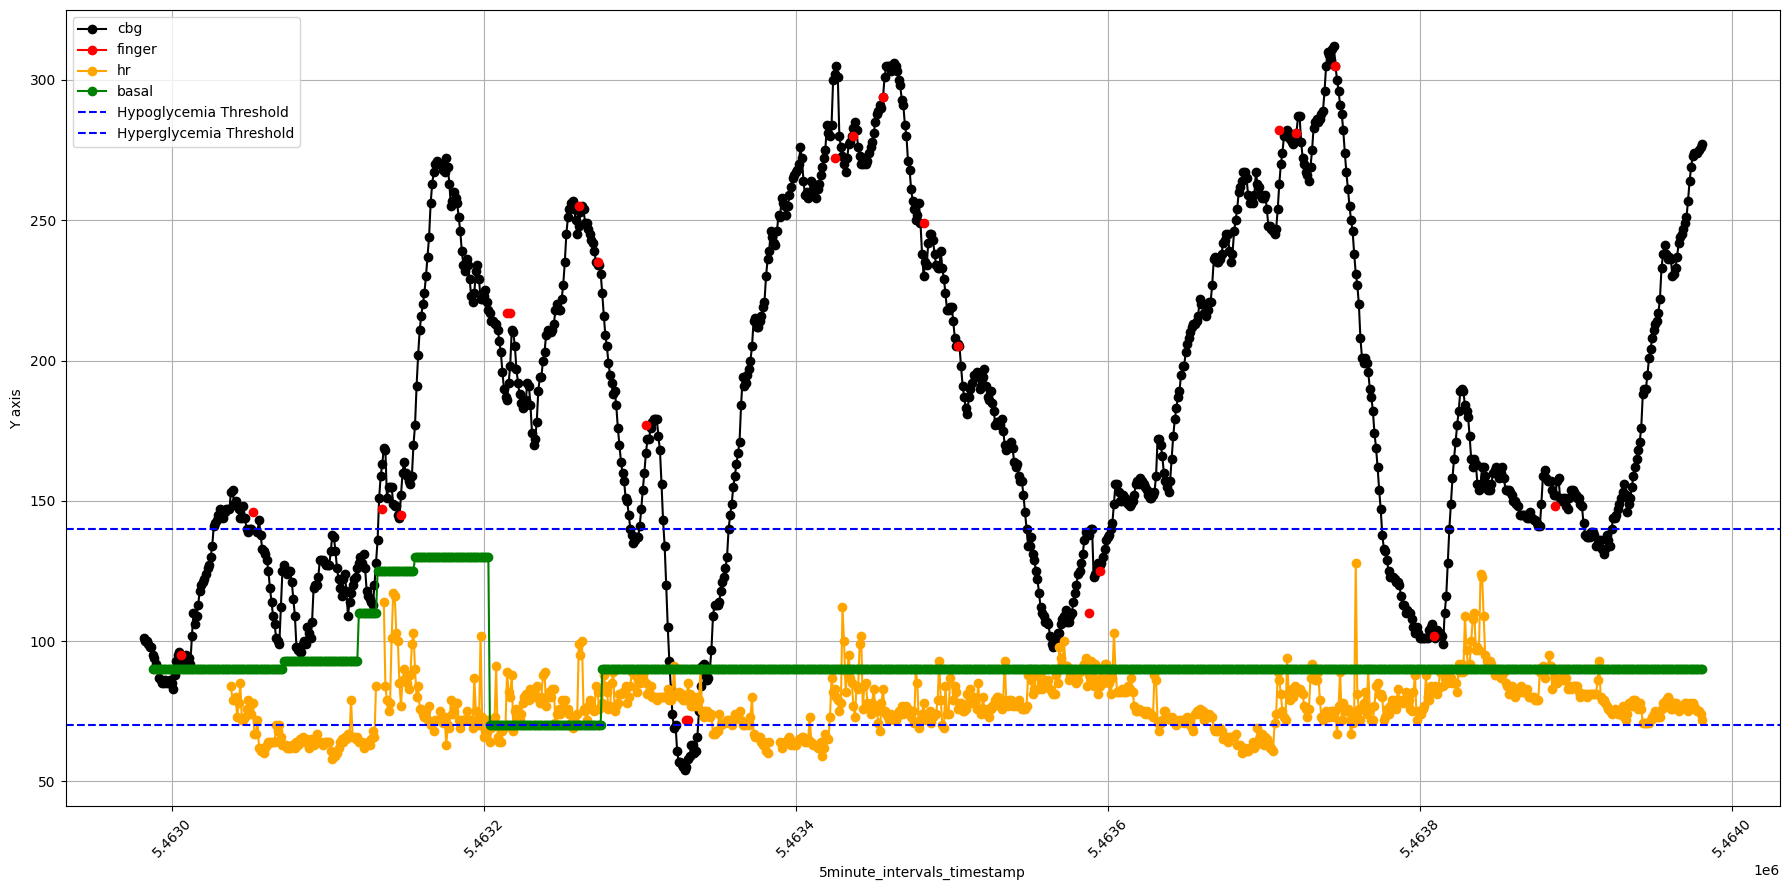

Patient:  575-ws-training_processed.csv


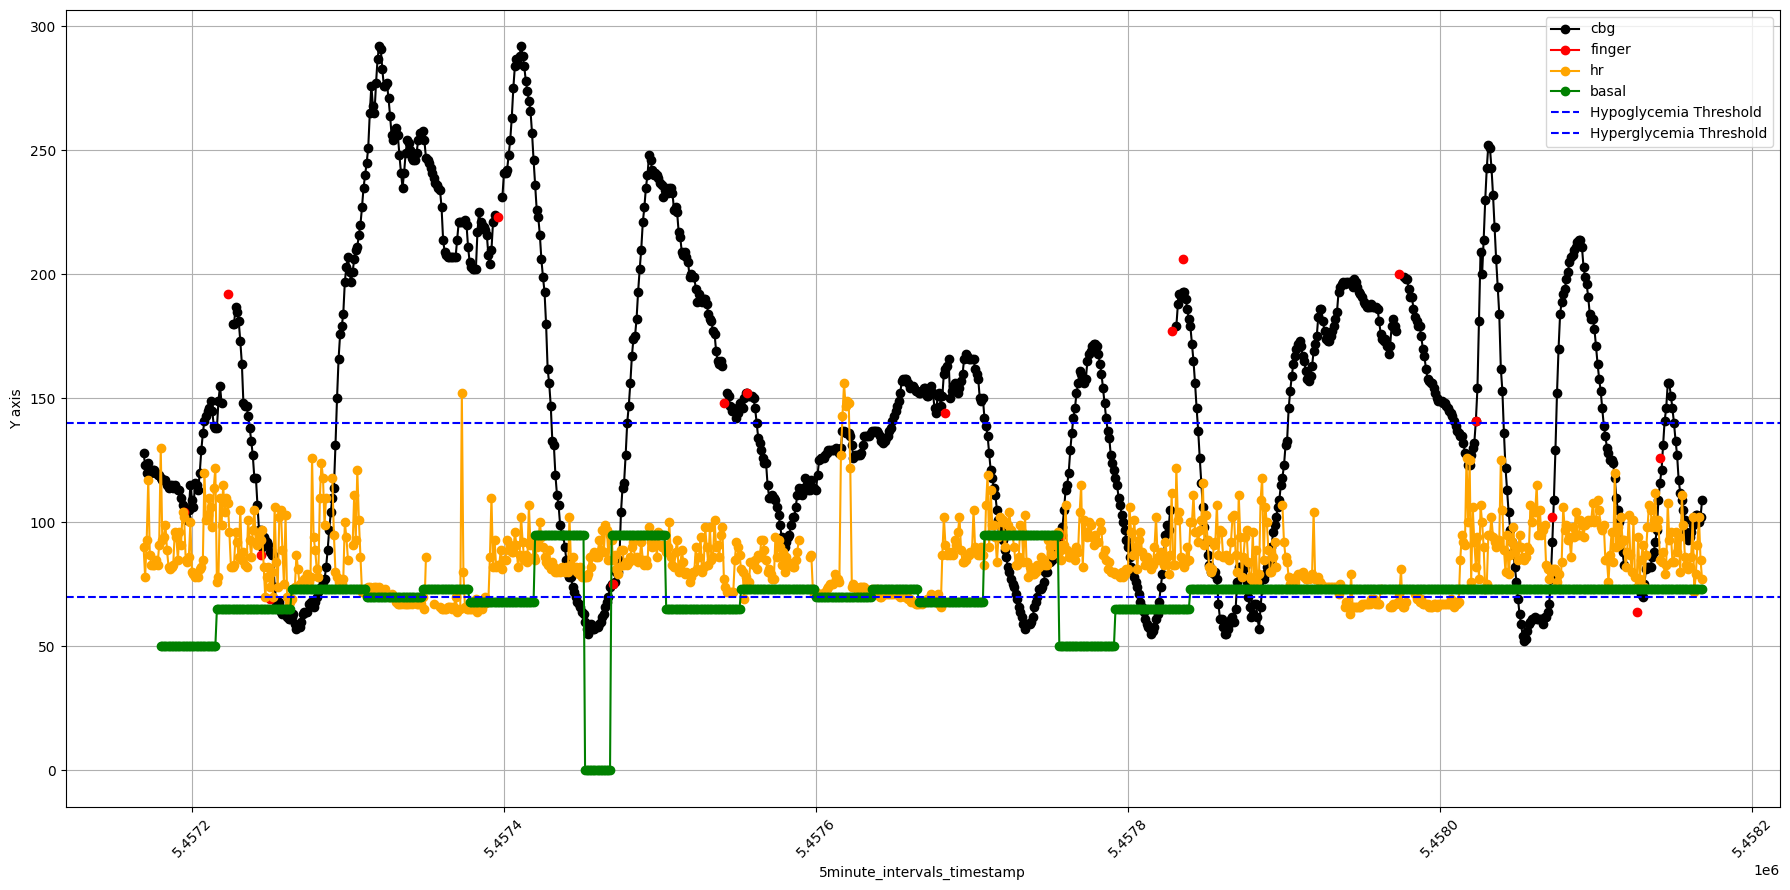

Patient:  588-ws-training_processed.csv


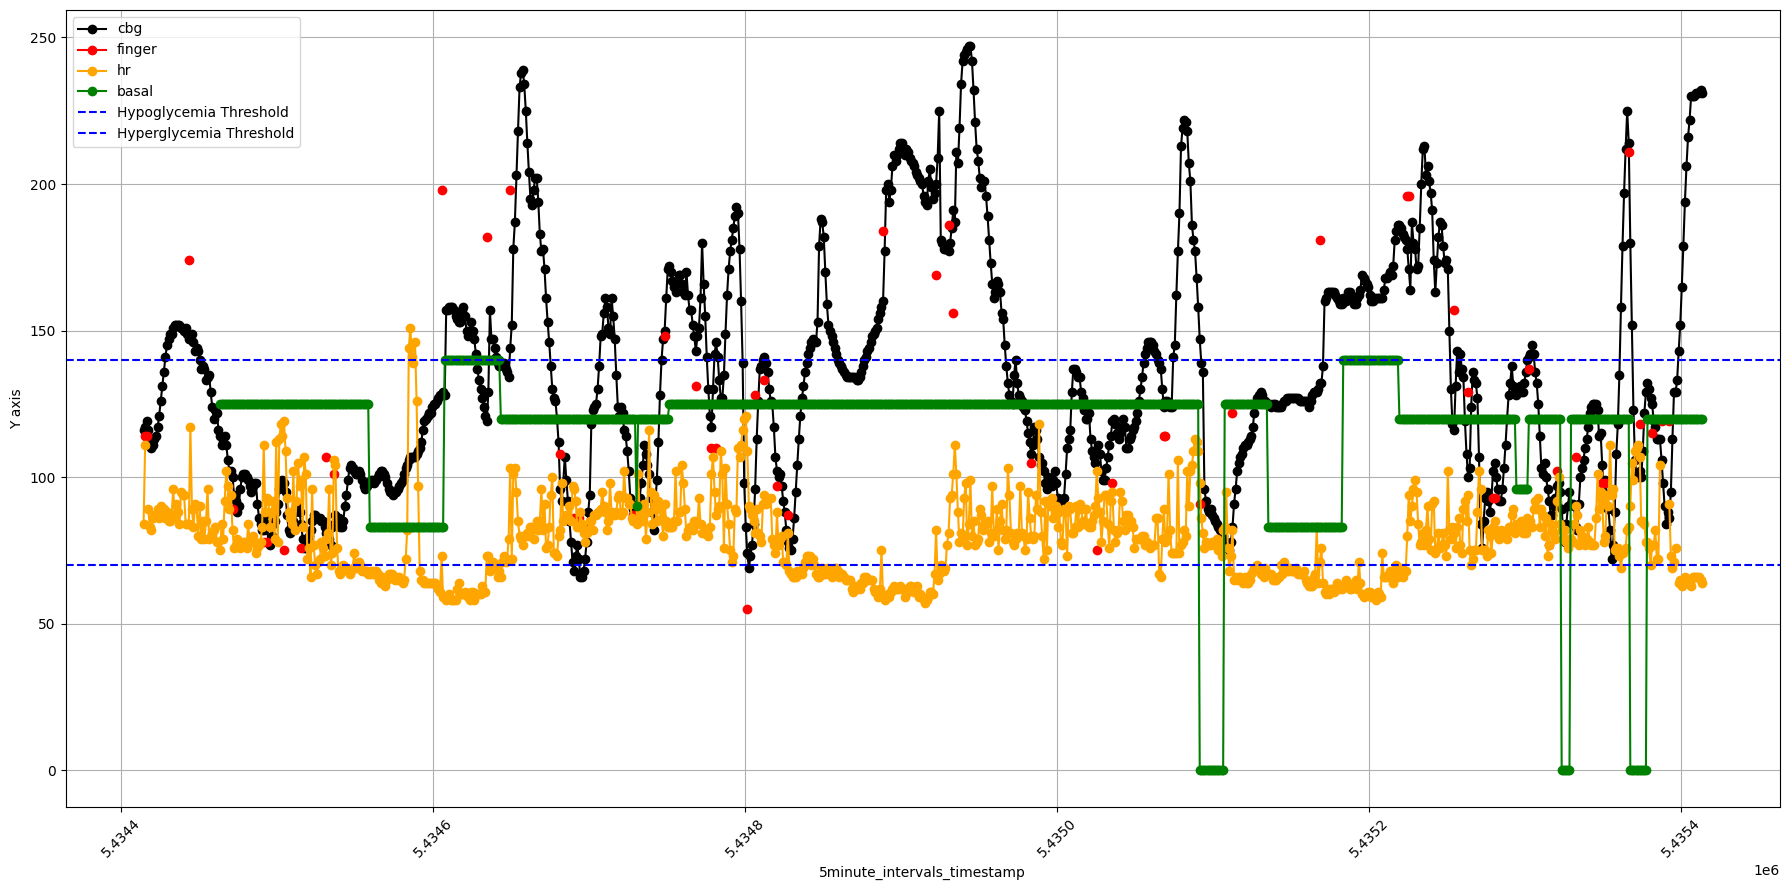

Patient:  591-ws-training_processed.csv


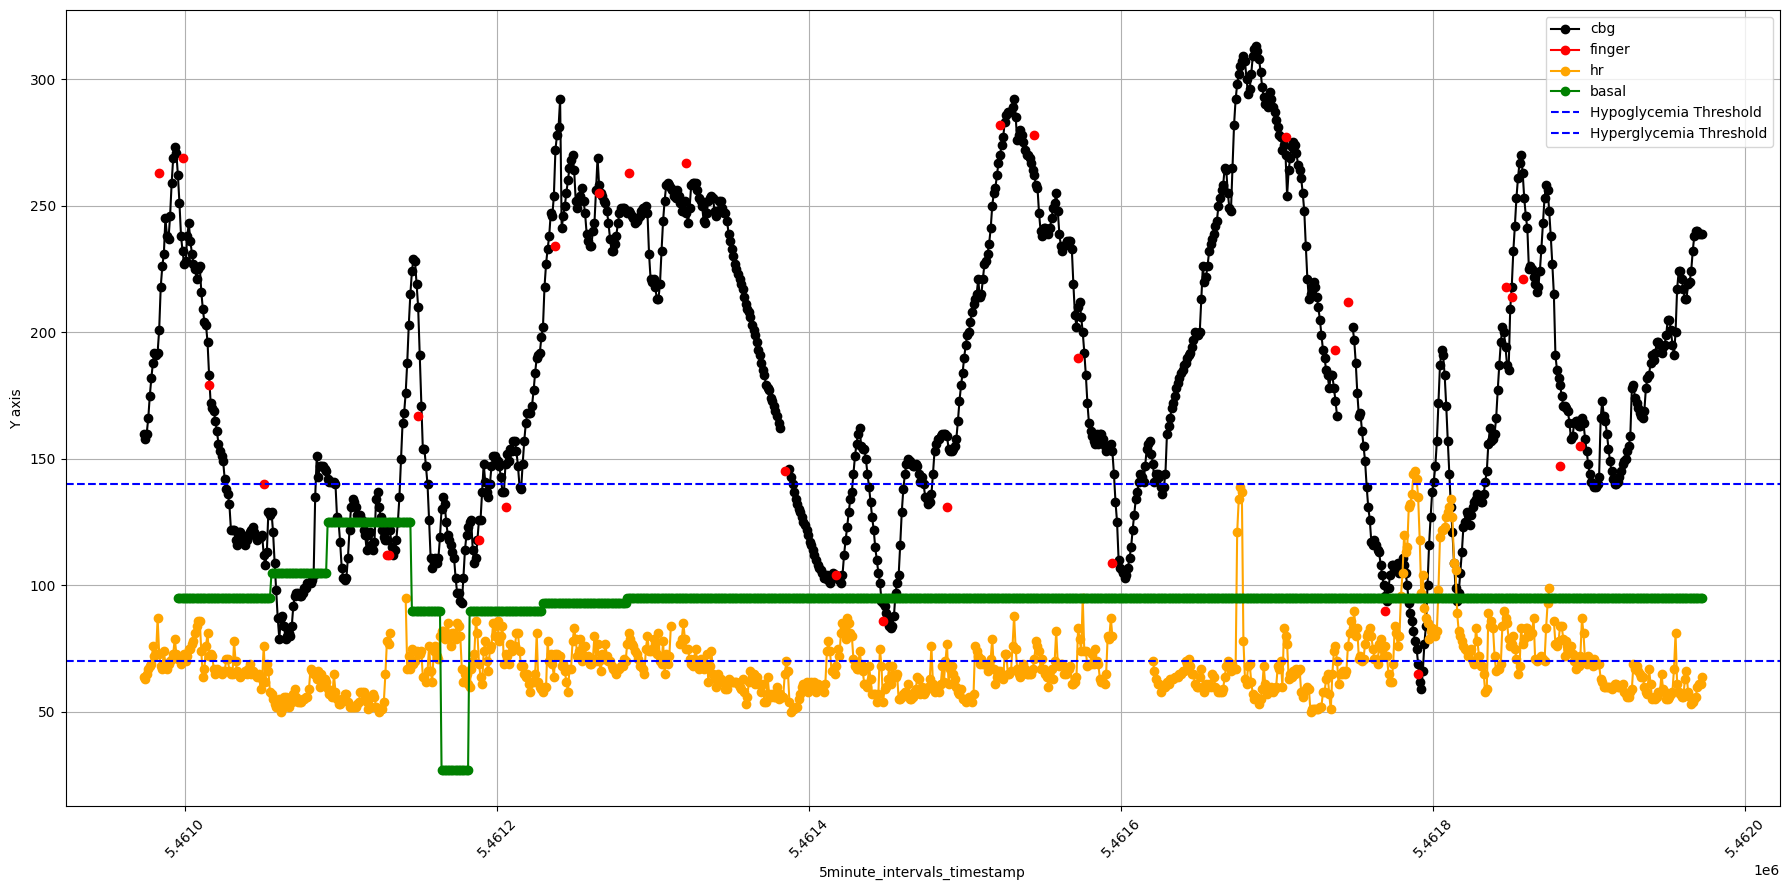

Data: test_set_2018
Patient:  559-ws-testing_processed.csv


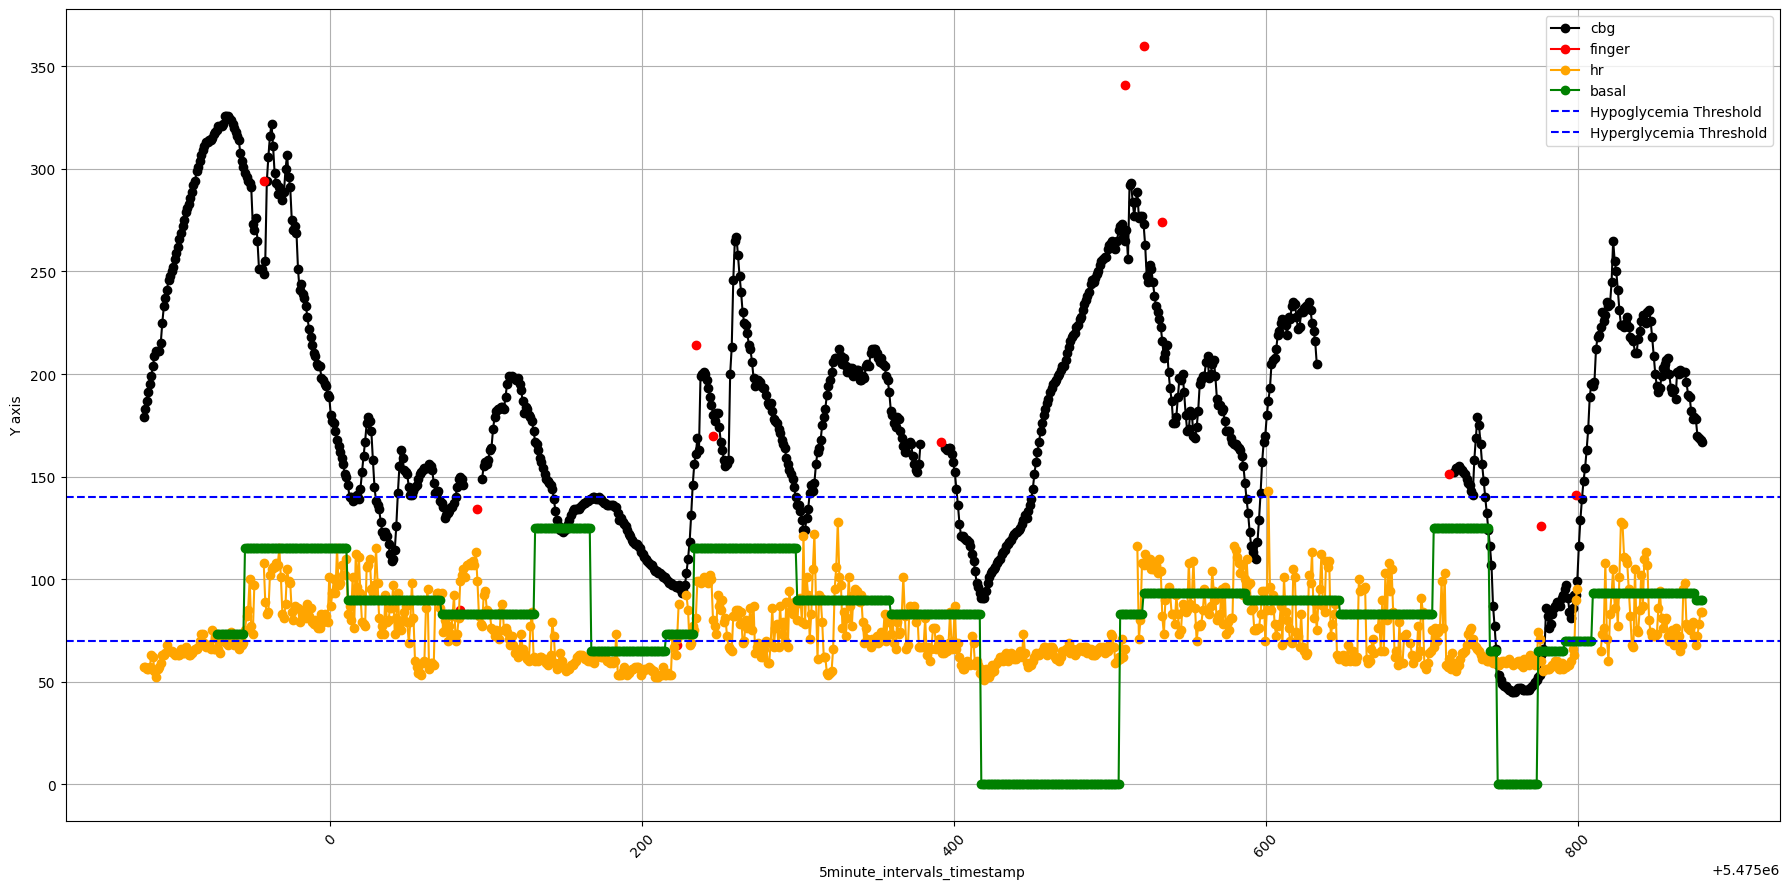

Patient:  563-ws-testing_processed.csv


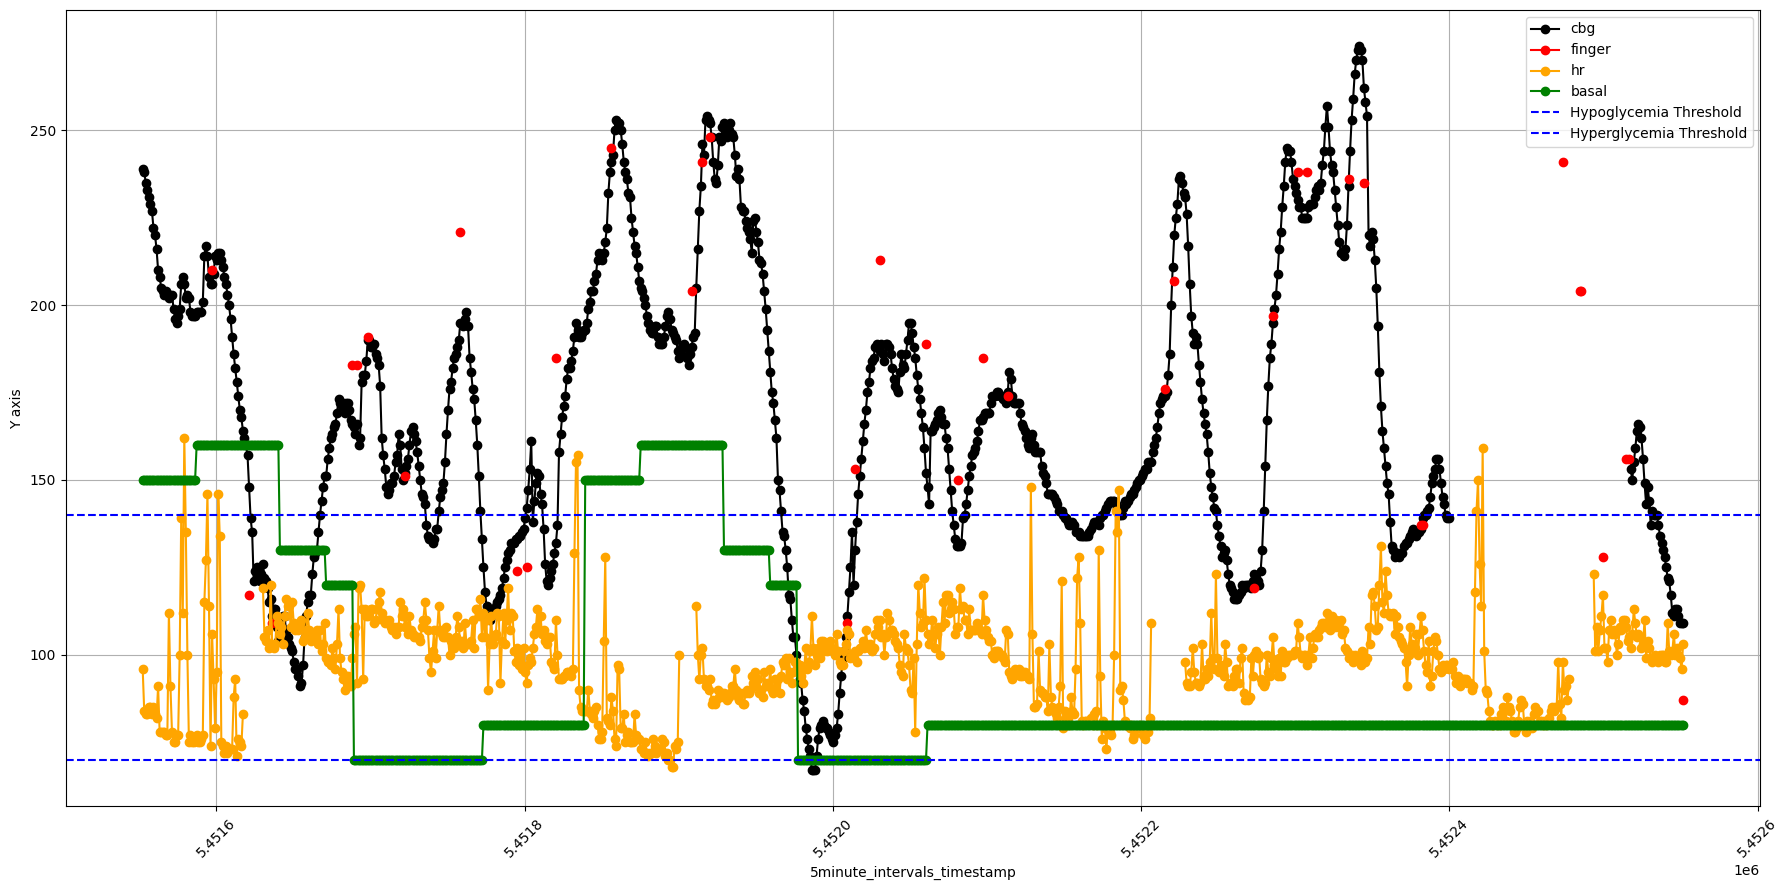

Patient:  570-ws-testing_processed.csv


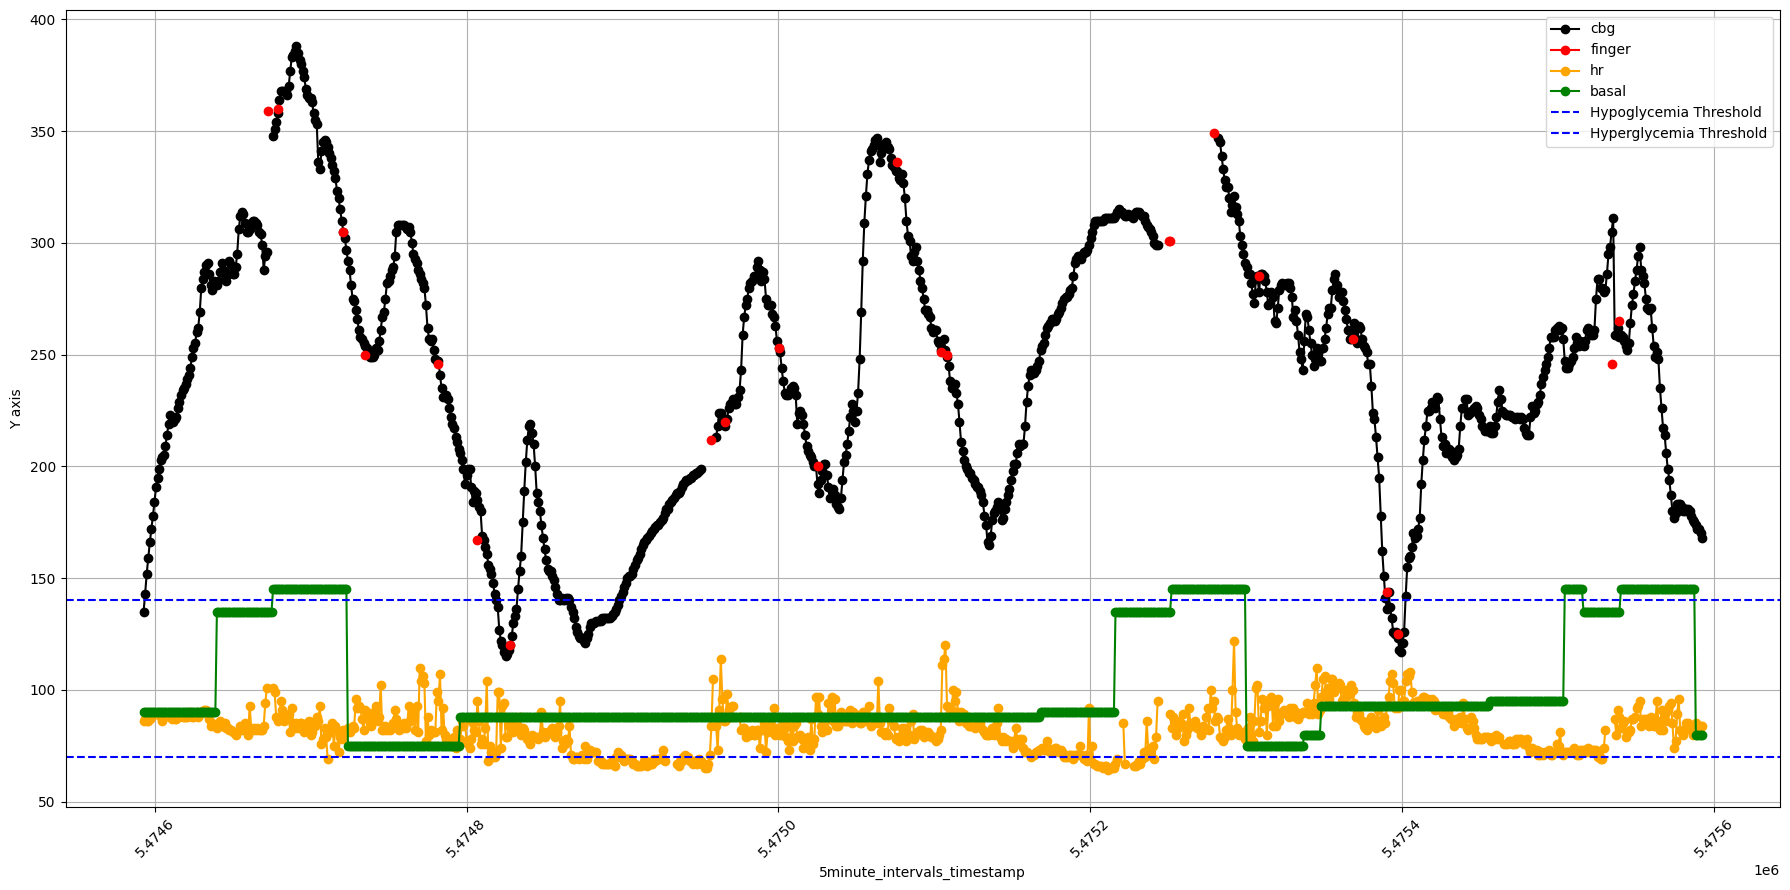

Patient:  575-ws-testing_processed.csv


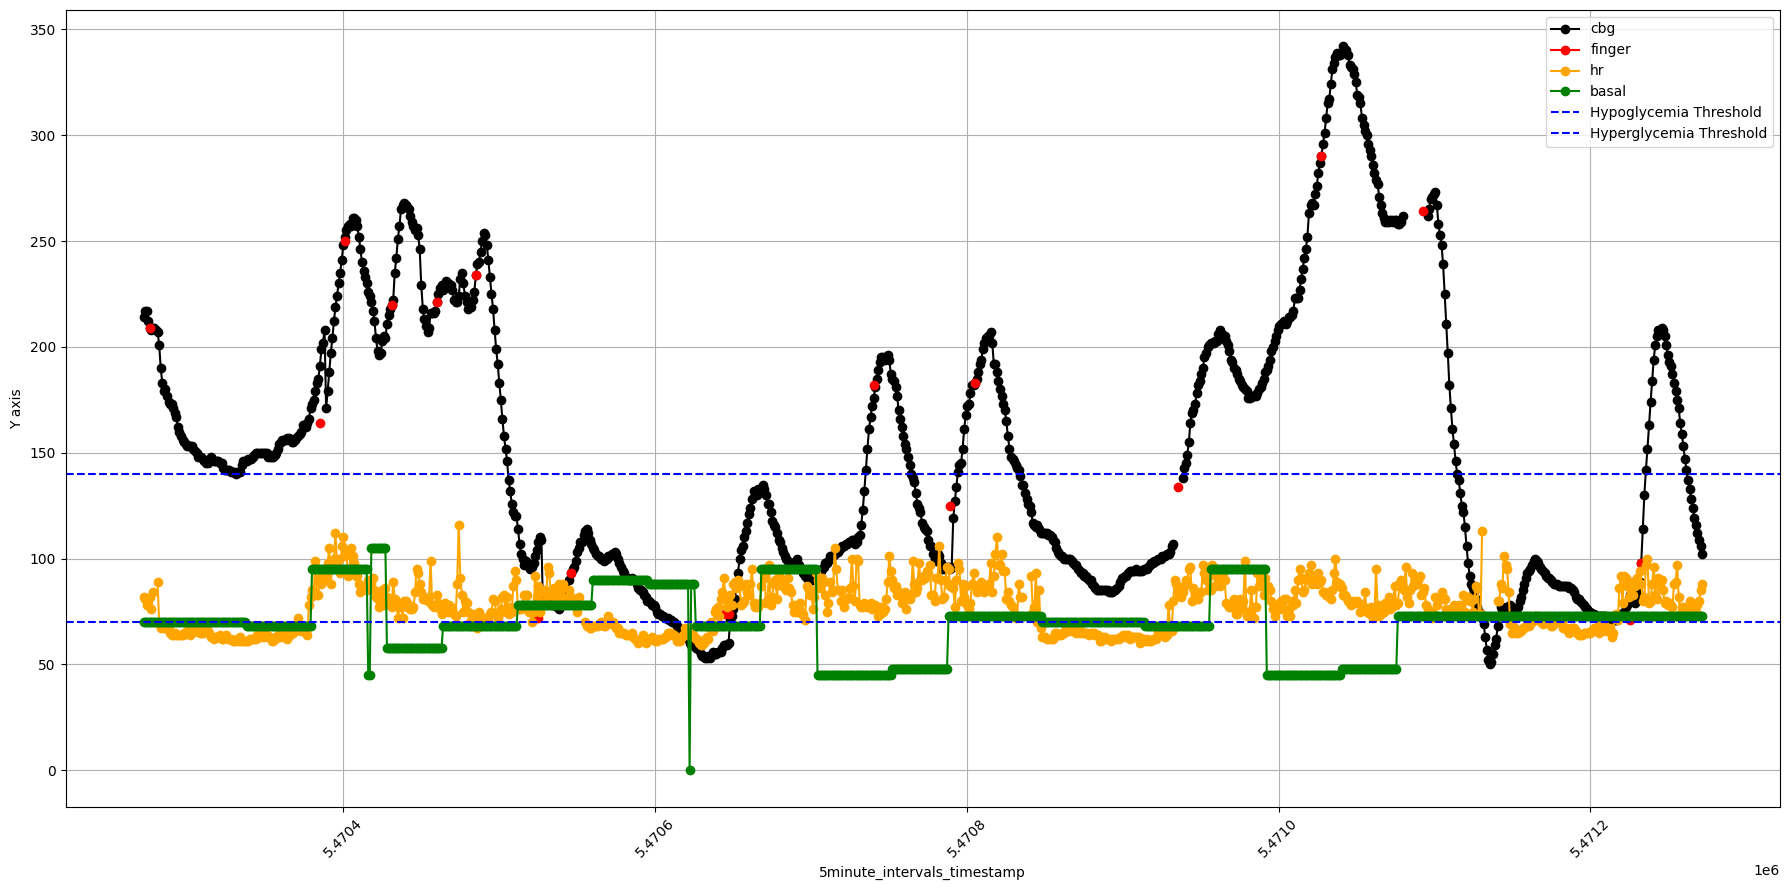

Patient:  588-ws-testing_processed.csv


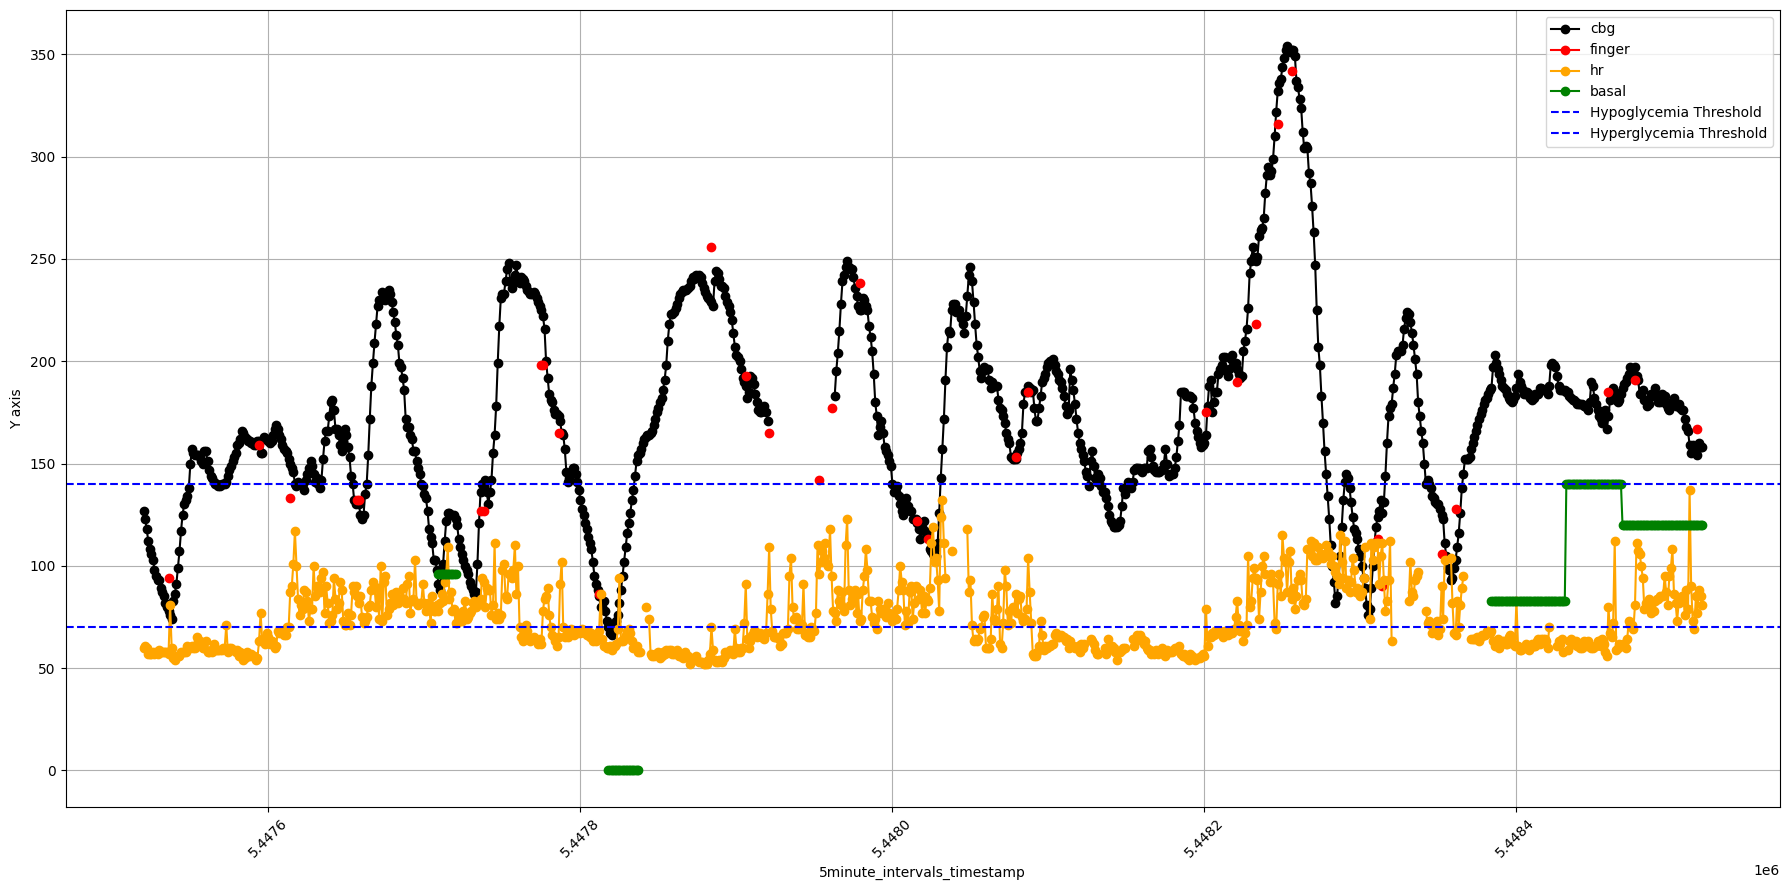

Patient:  591-ws-testing_processed.csv


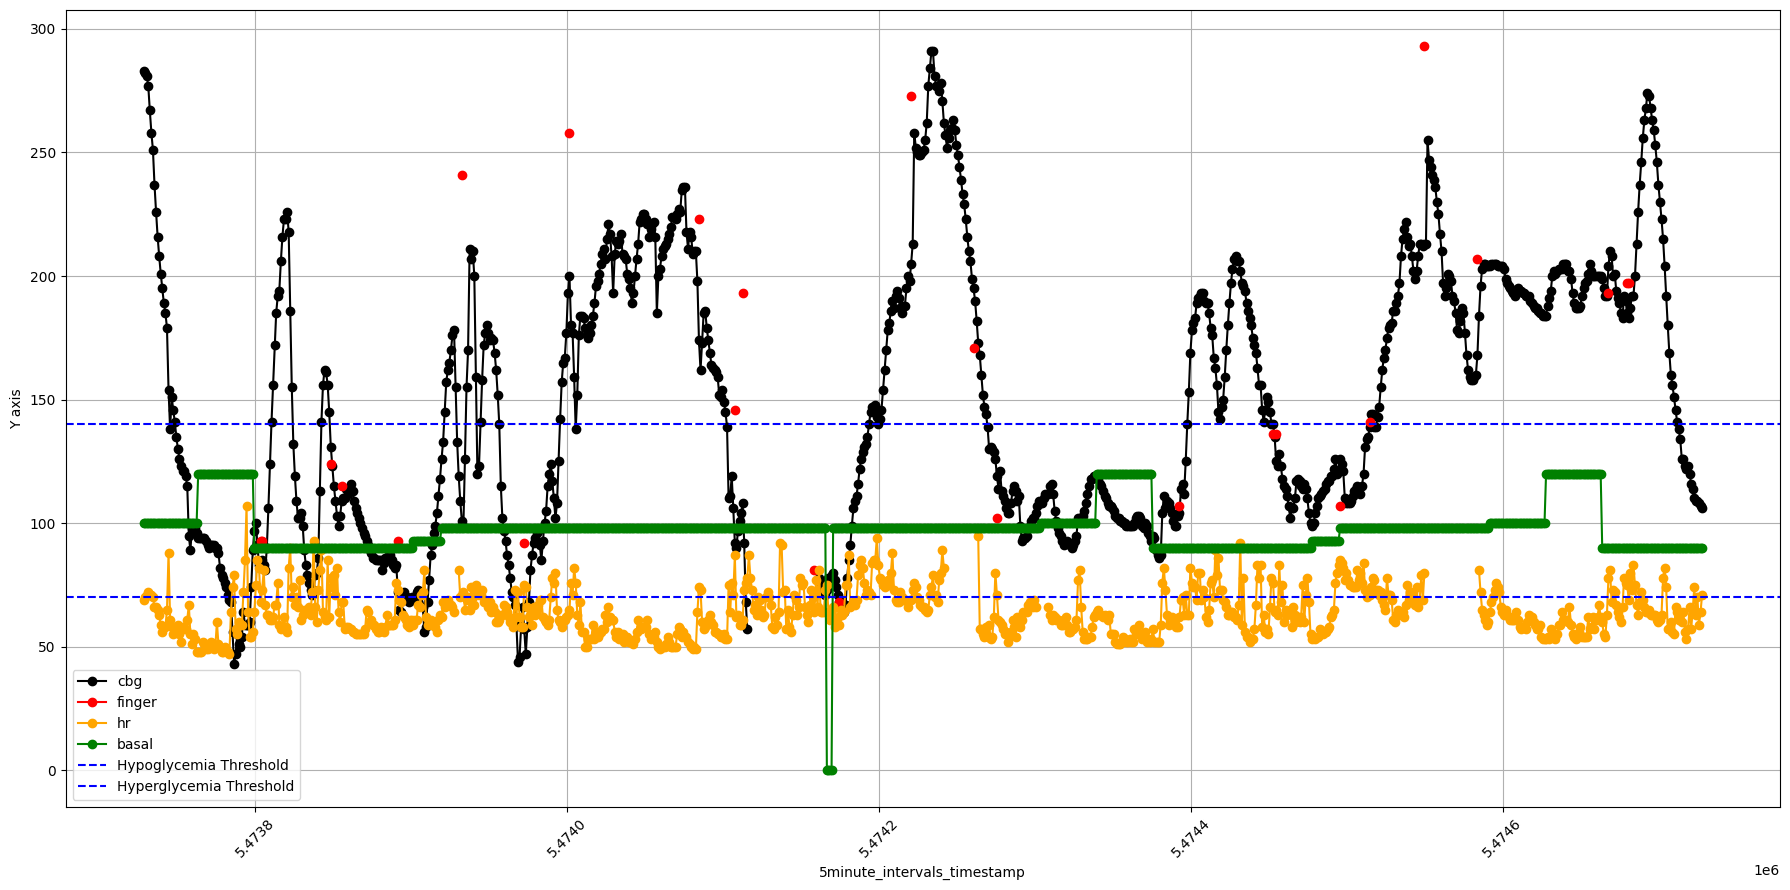

Data: train_set_2020
Patient:  540-ws-training_processed.csv


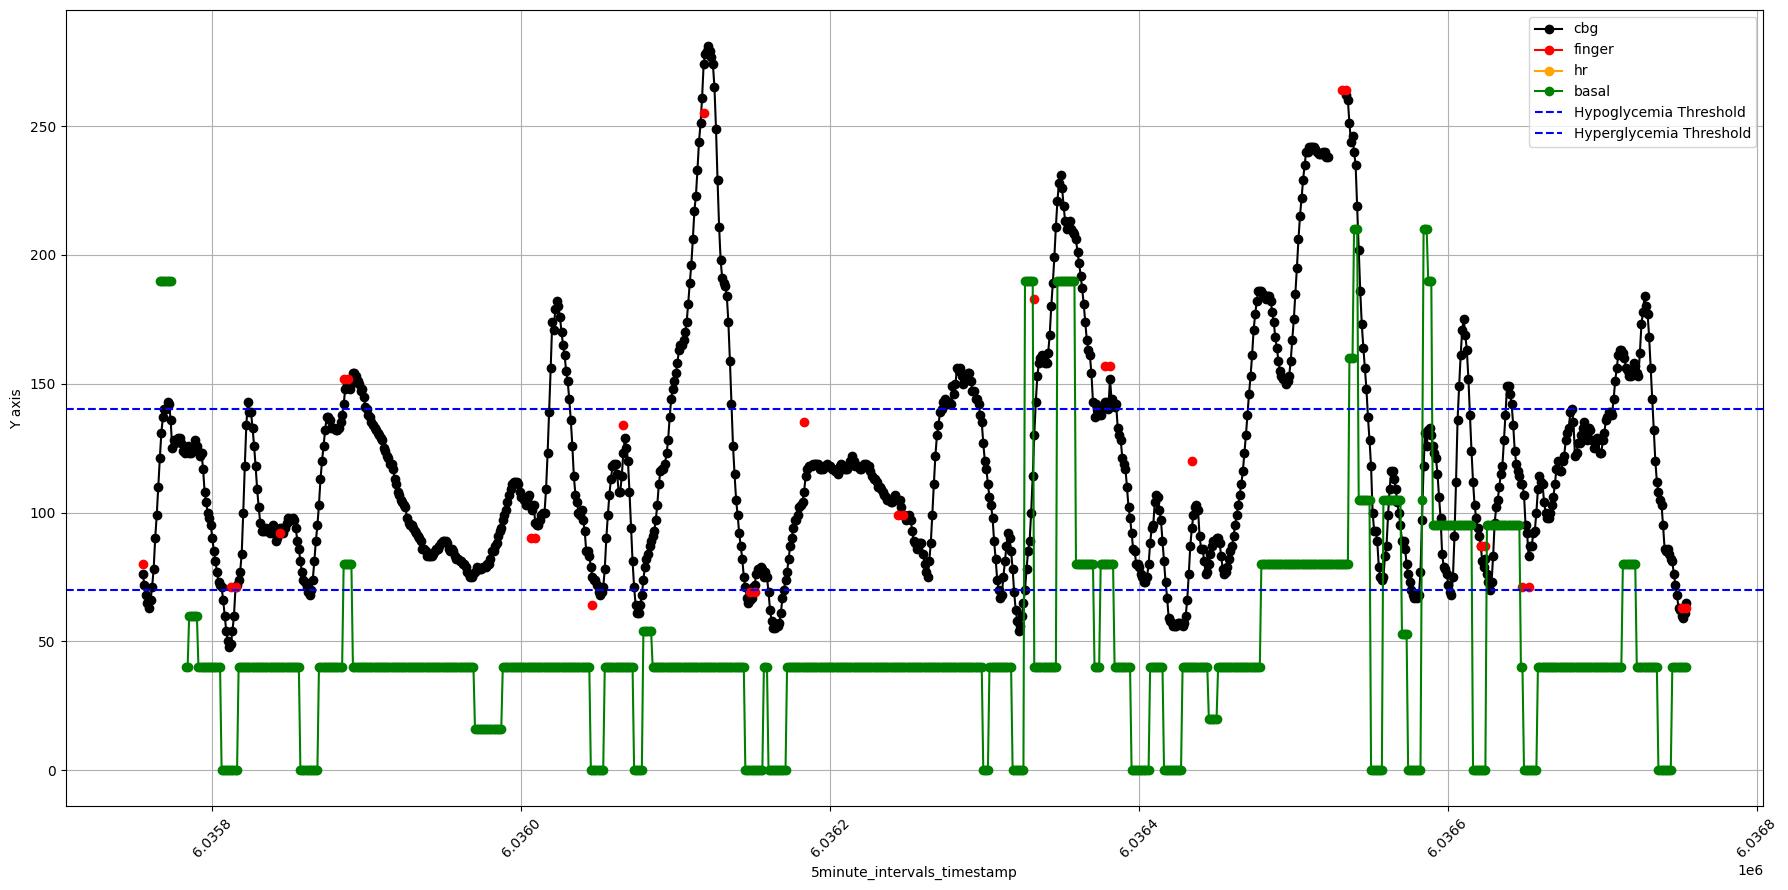

Patient:  544-ws-training_processed.csv


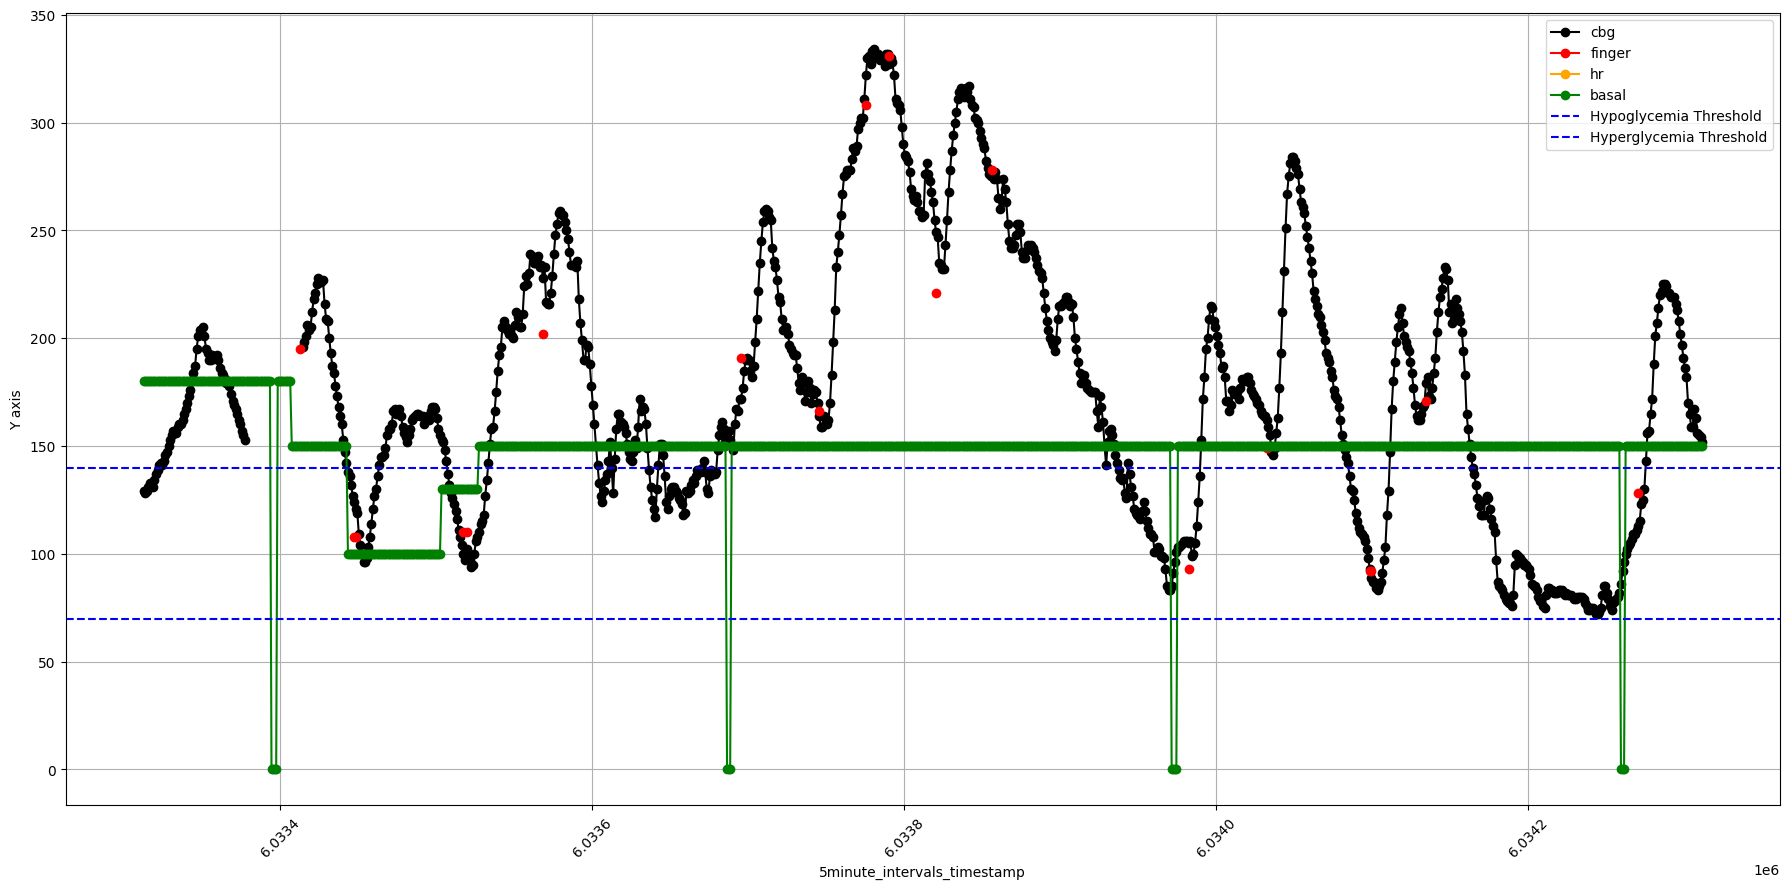

Patient:  552-ws-training_processed.csv


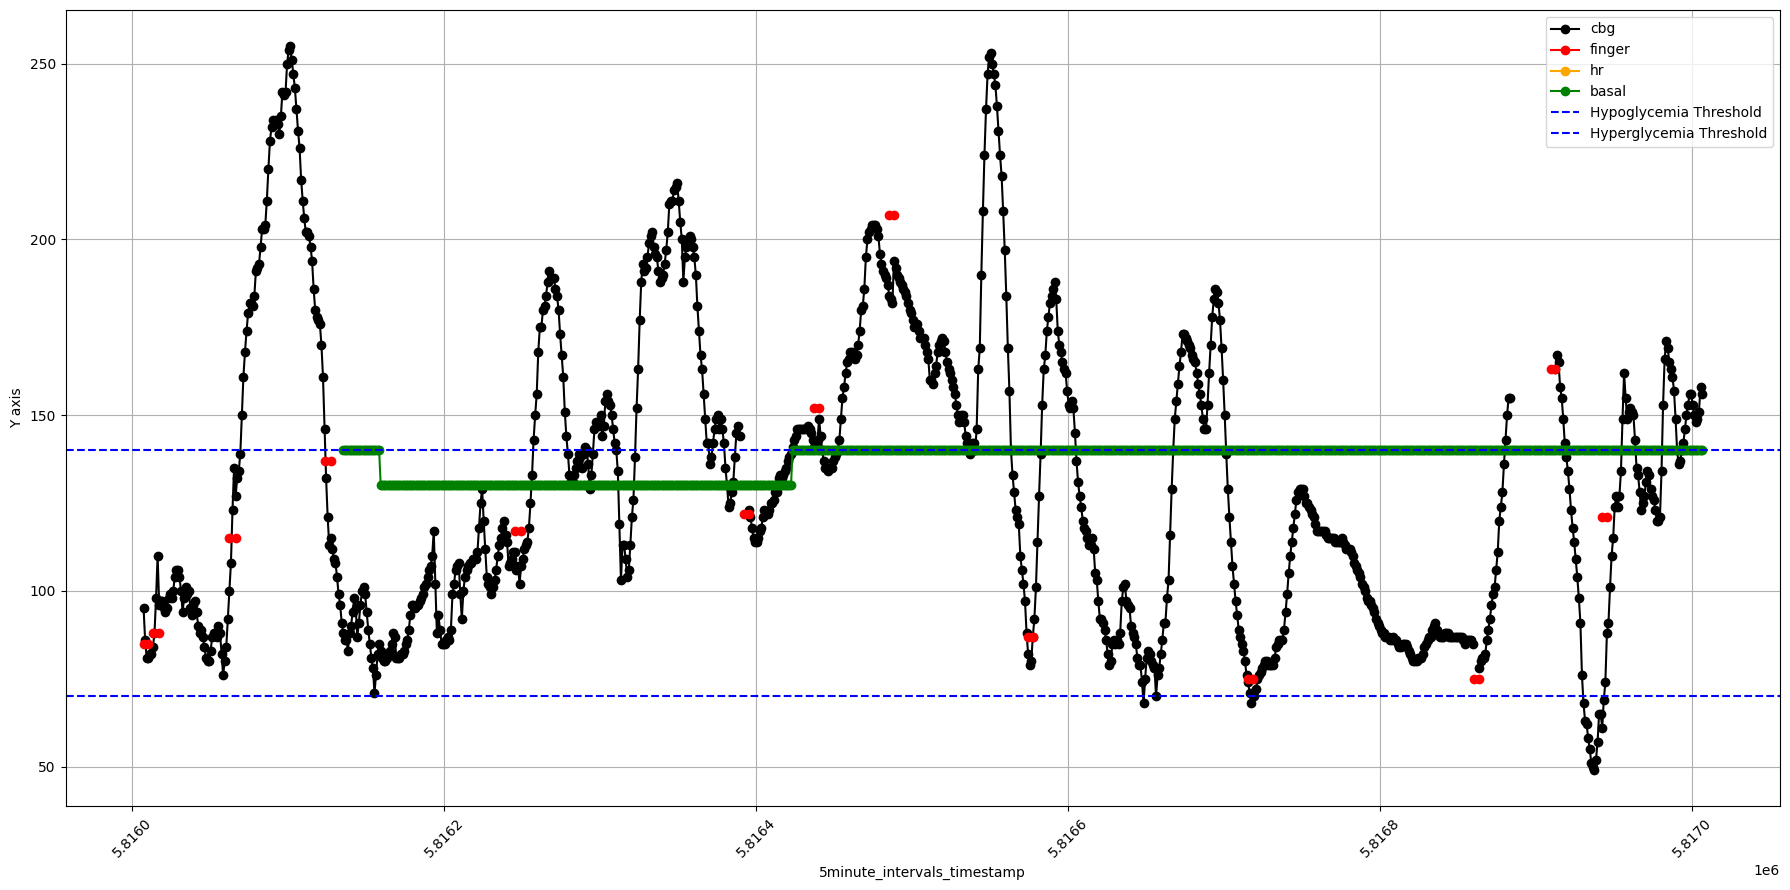

Patient:  567-ws-training_processed.csv


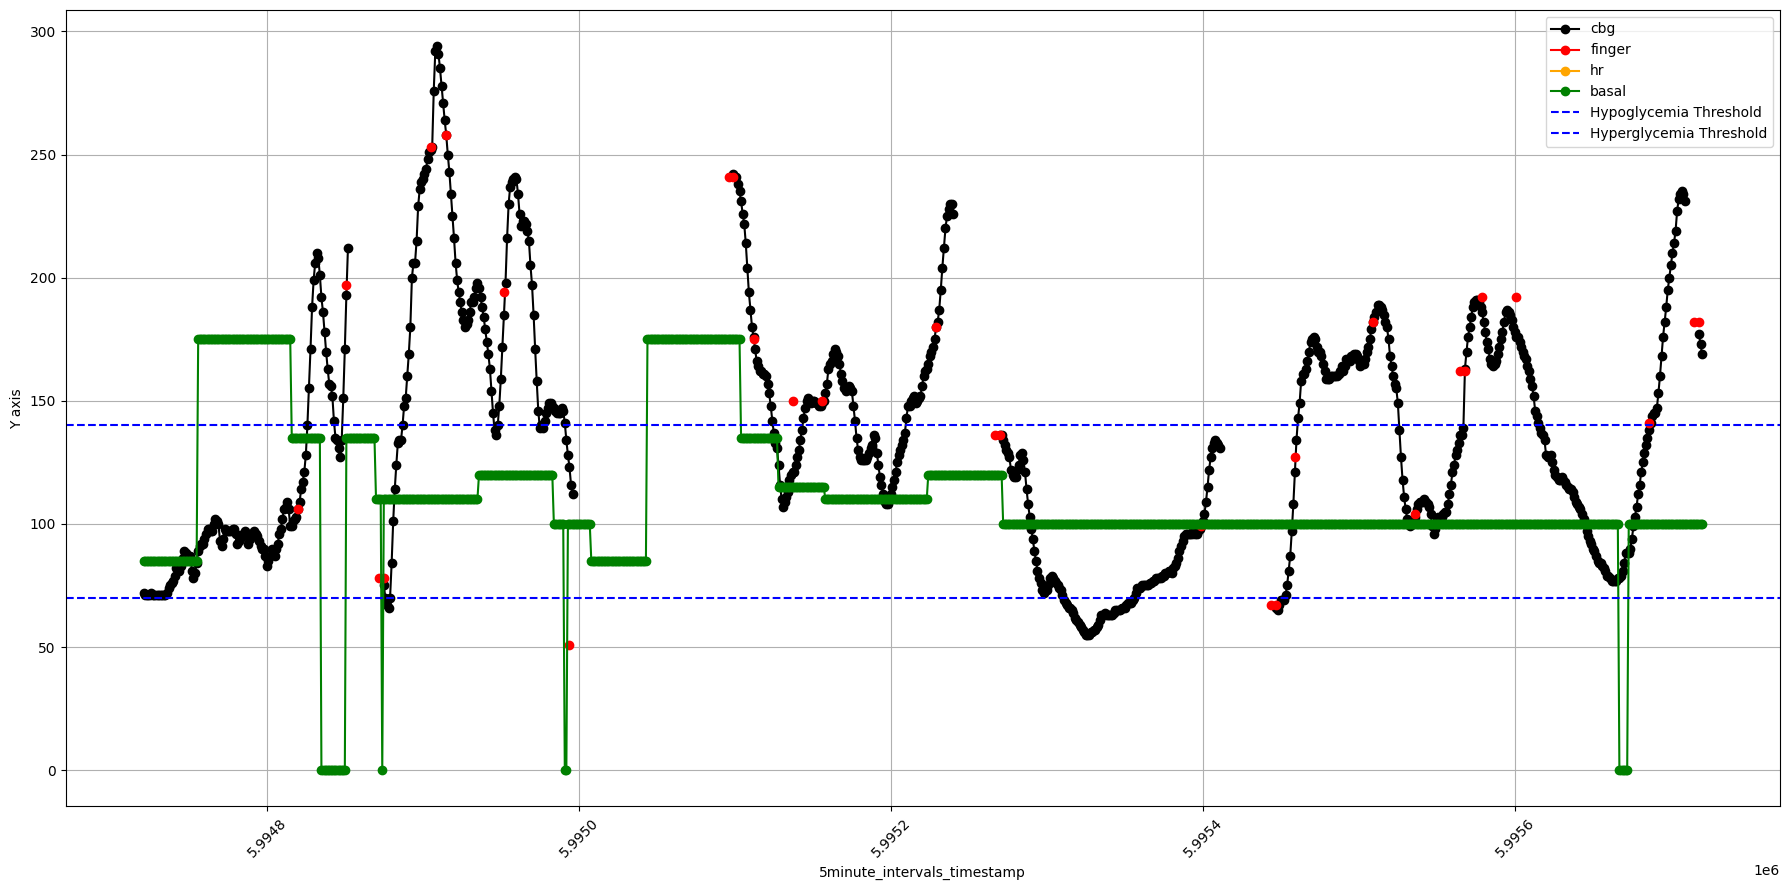

Patient:  584-ws-training_processed.csv


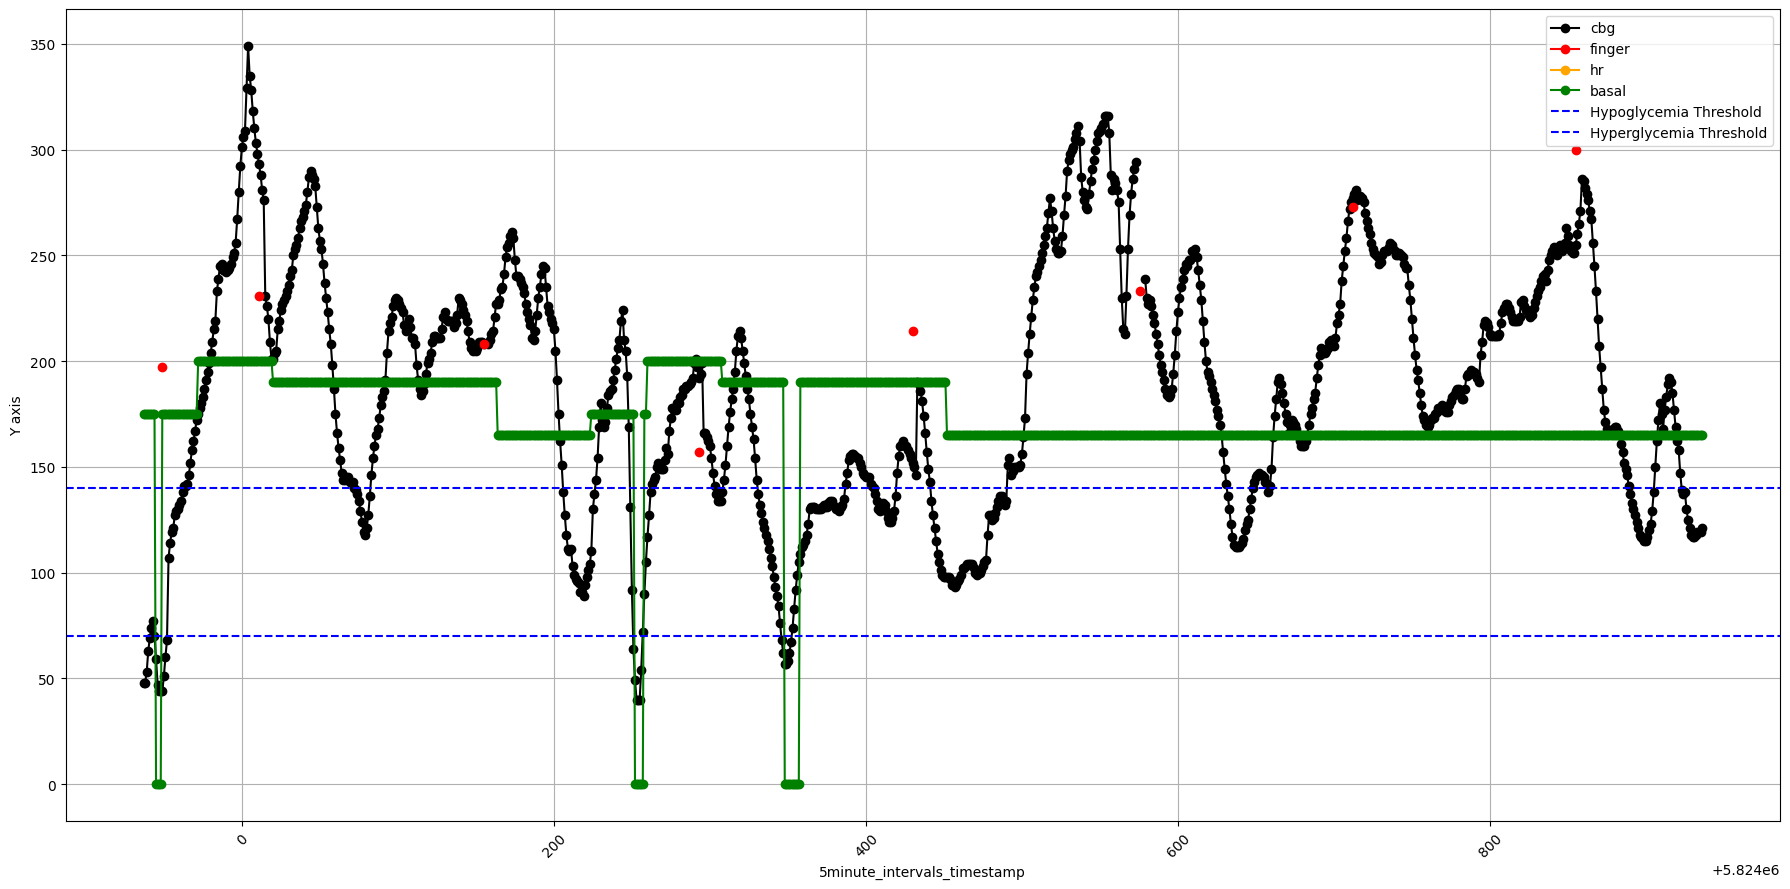

Patient:  596-ws-training_processed.csv


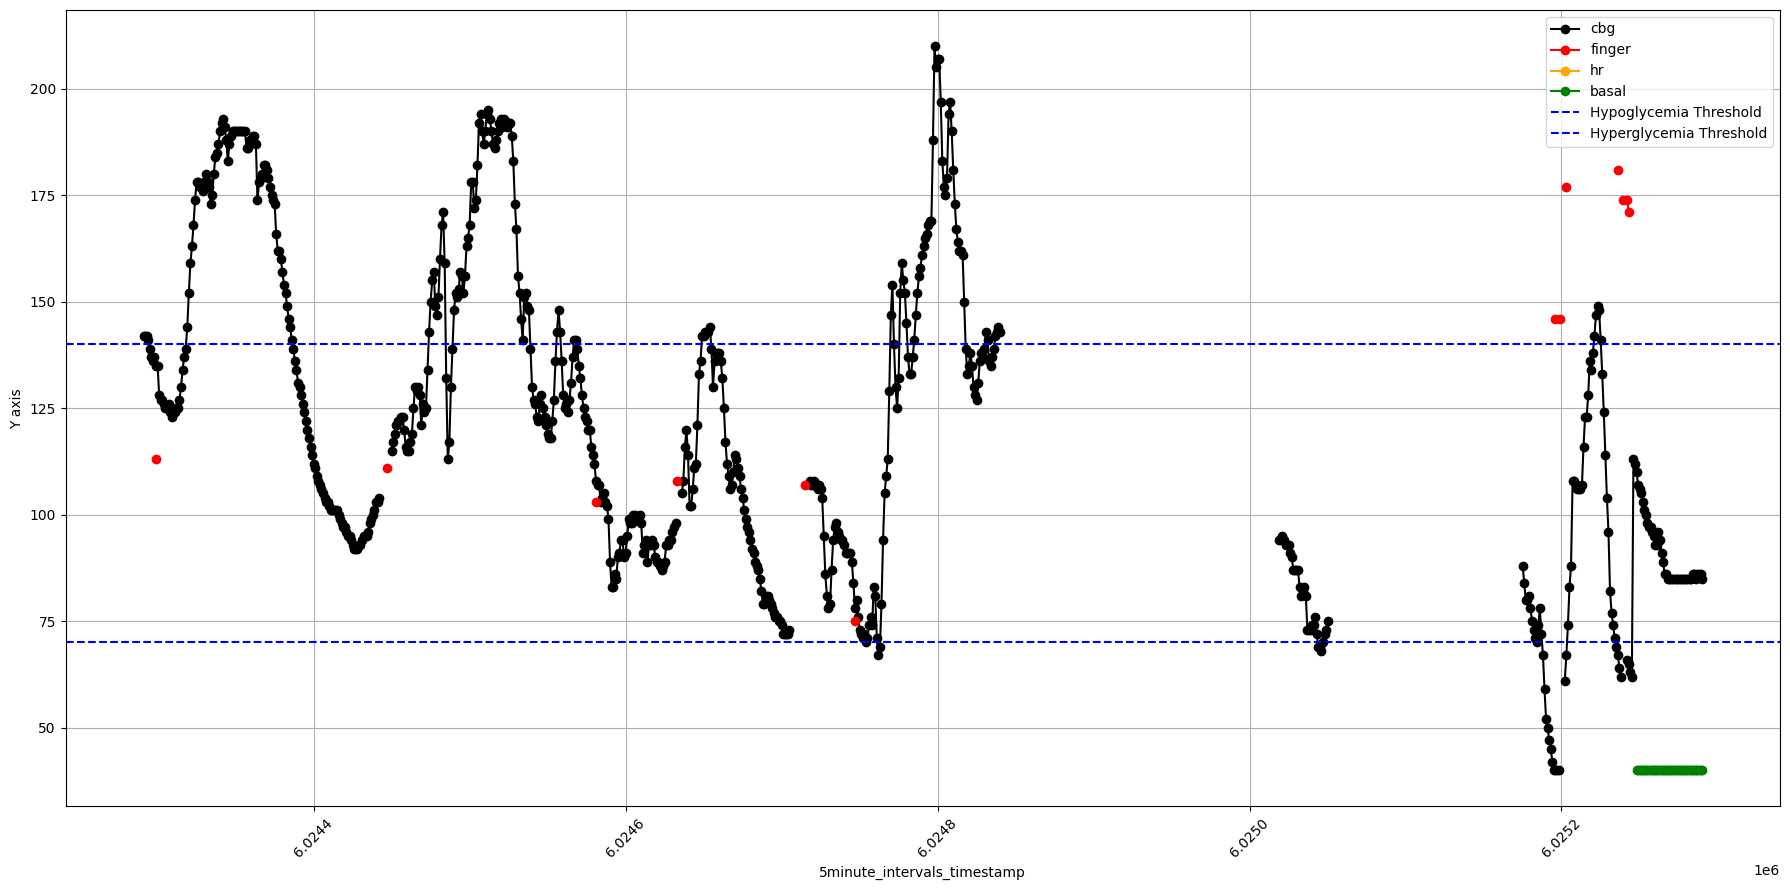

Data: test_set_2020
Patient:  540-ws-testing_processed.csv


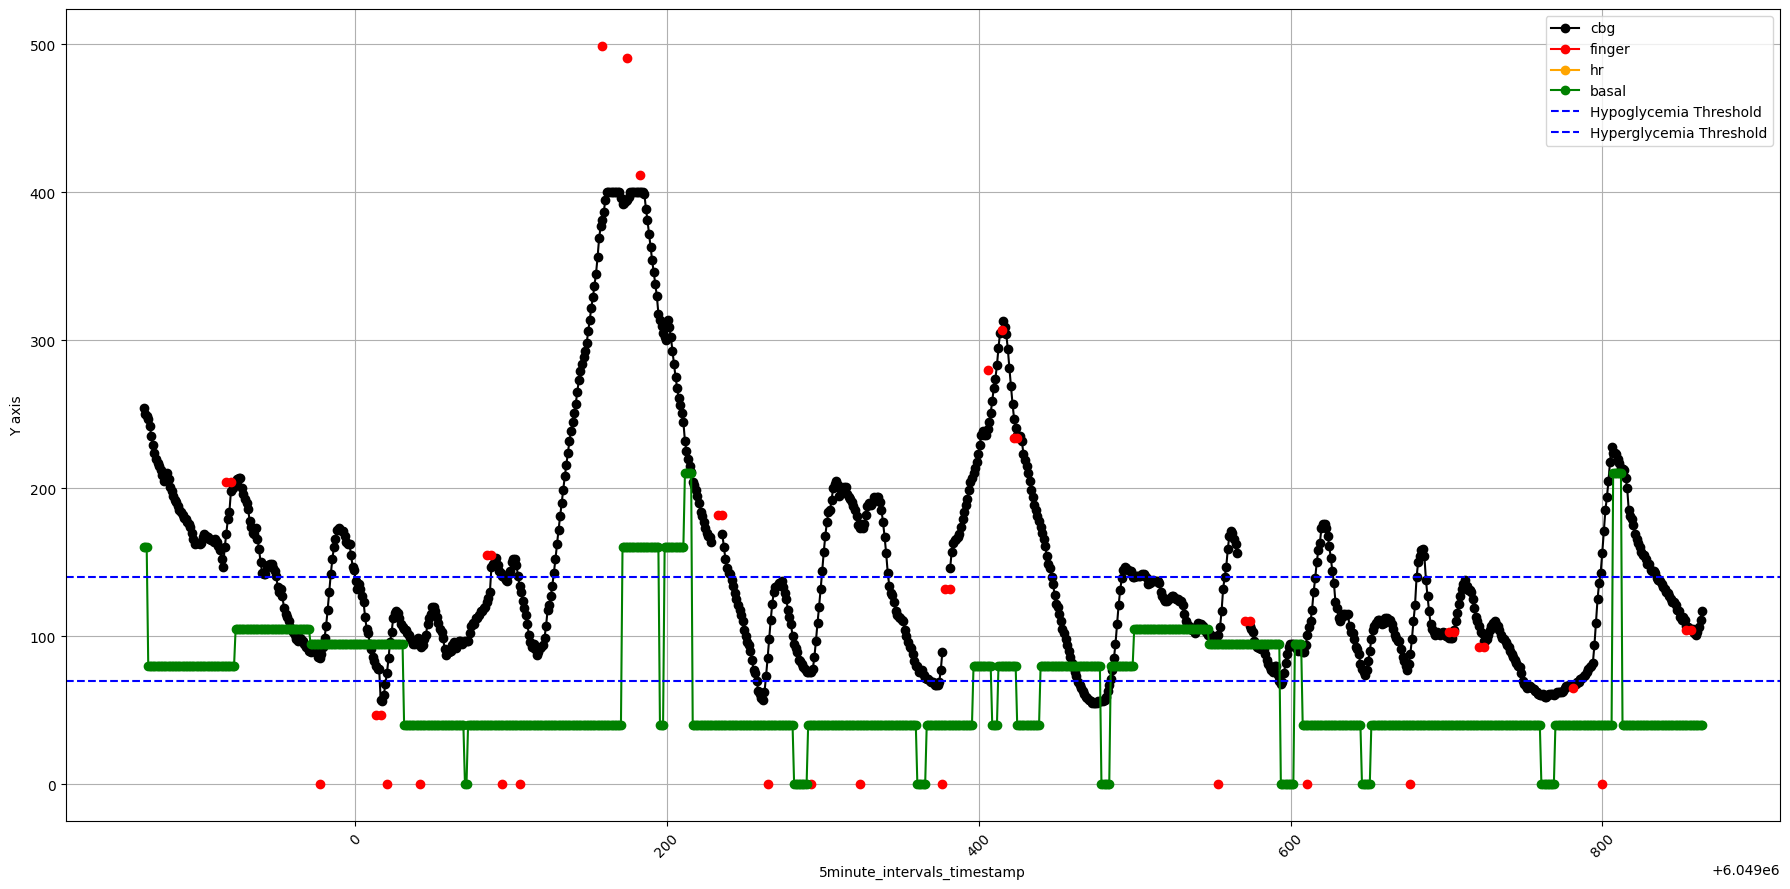

Patient:  544-ws-testing_processed.csv


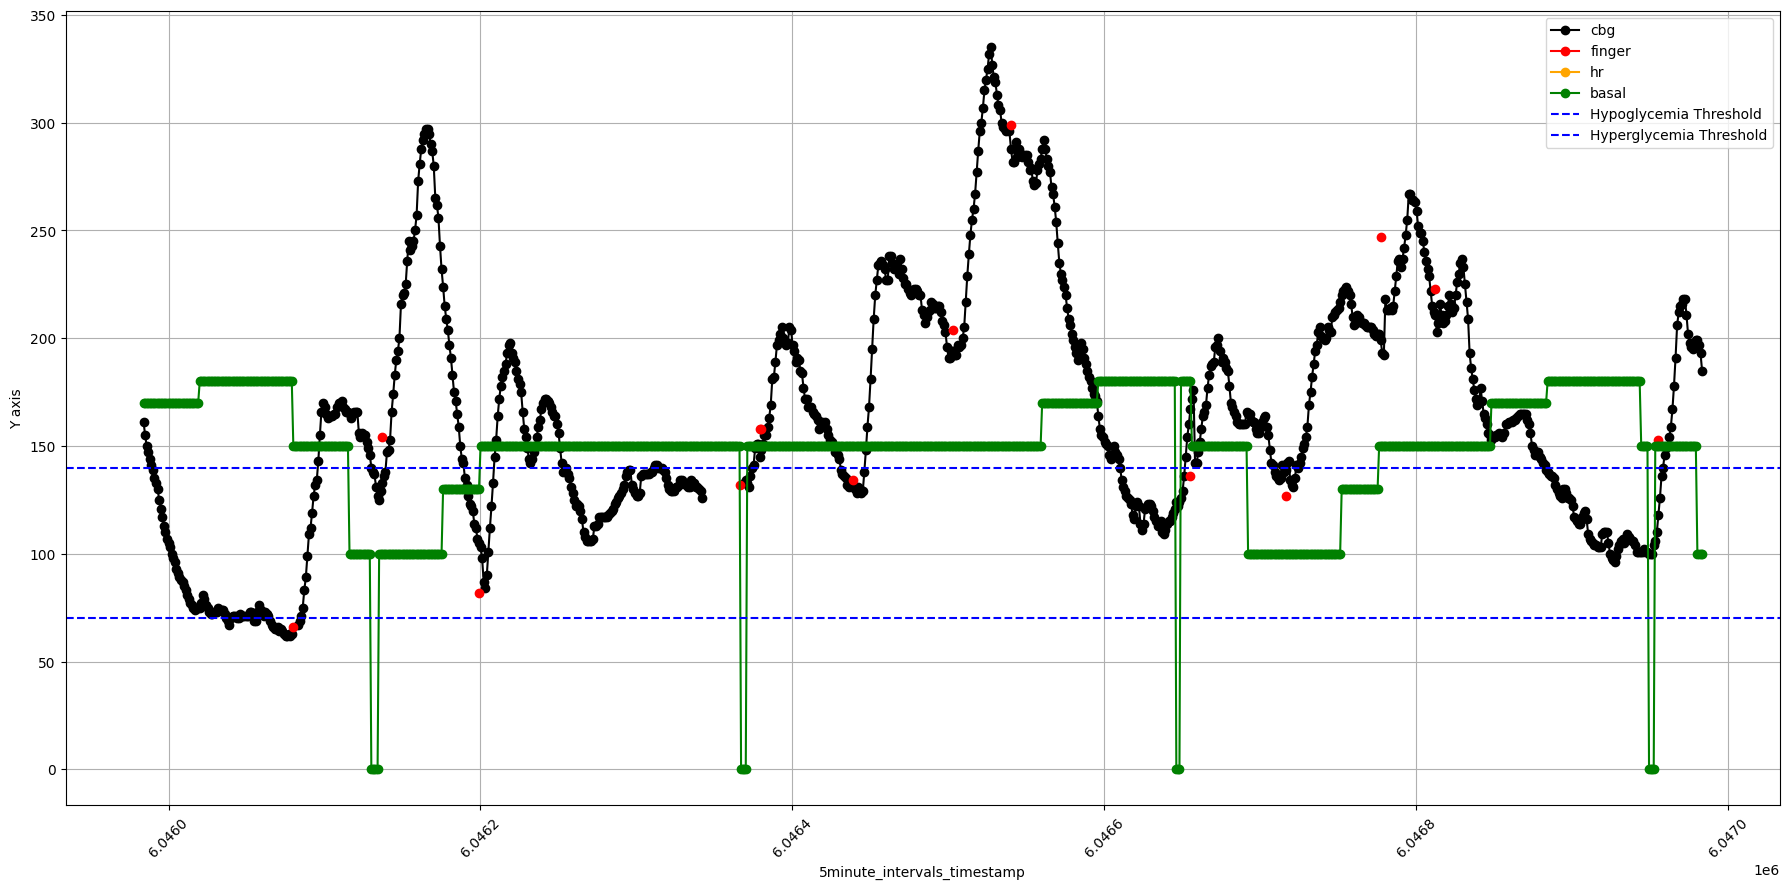

Patient:  552-ws-testing_processed.csv


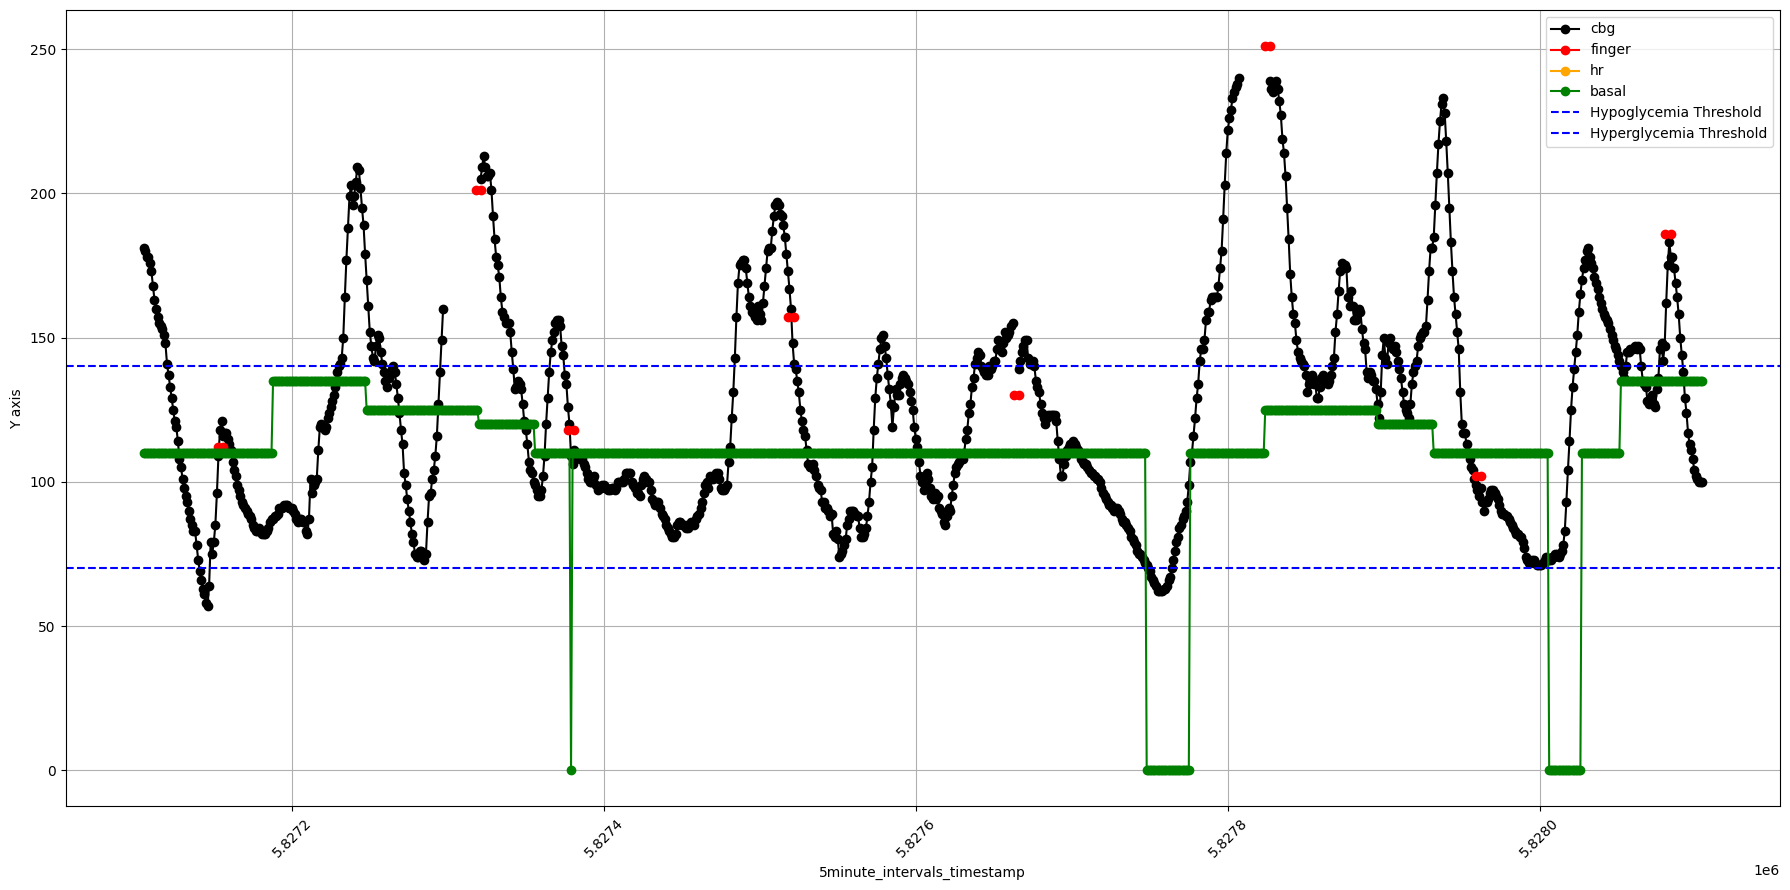

Patient:  567-ws-testing_processed.csv


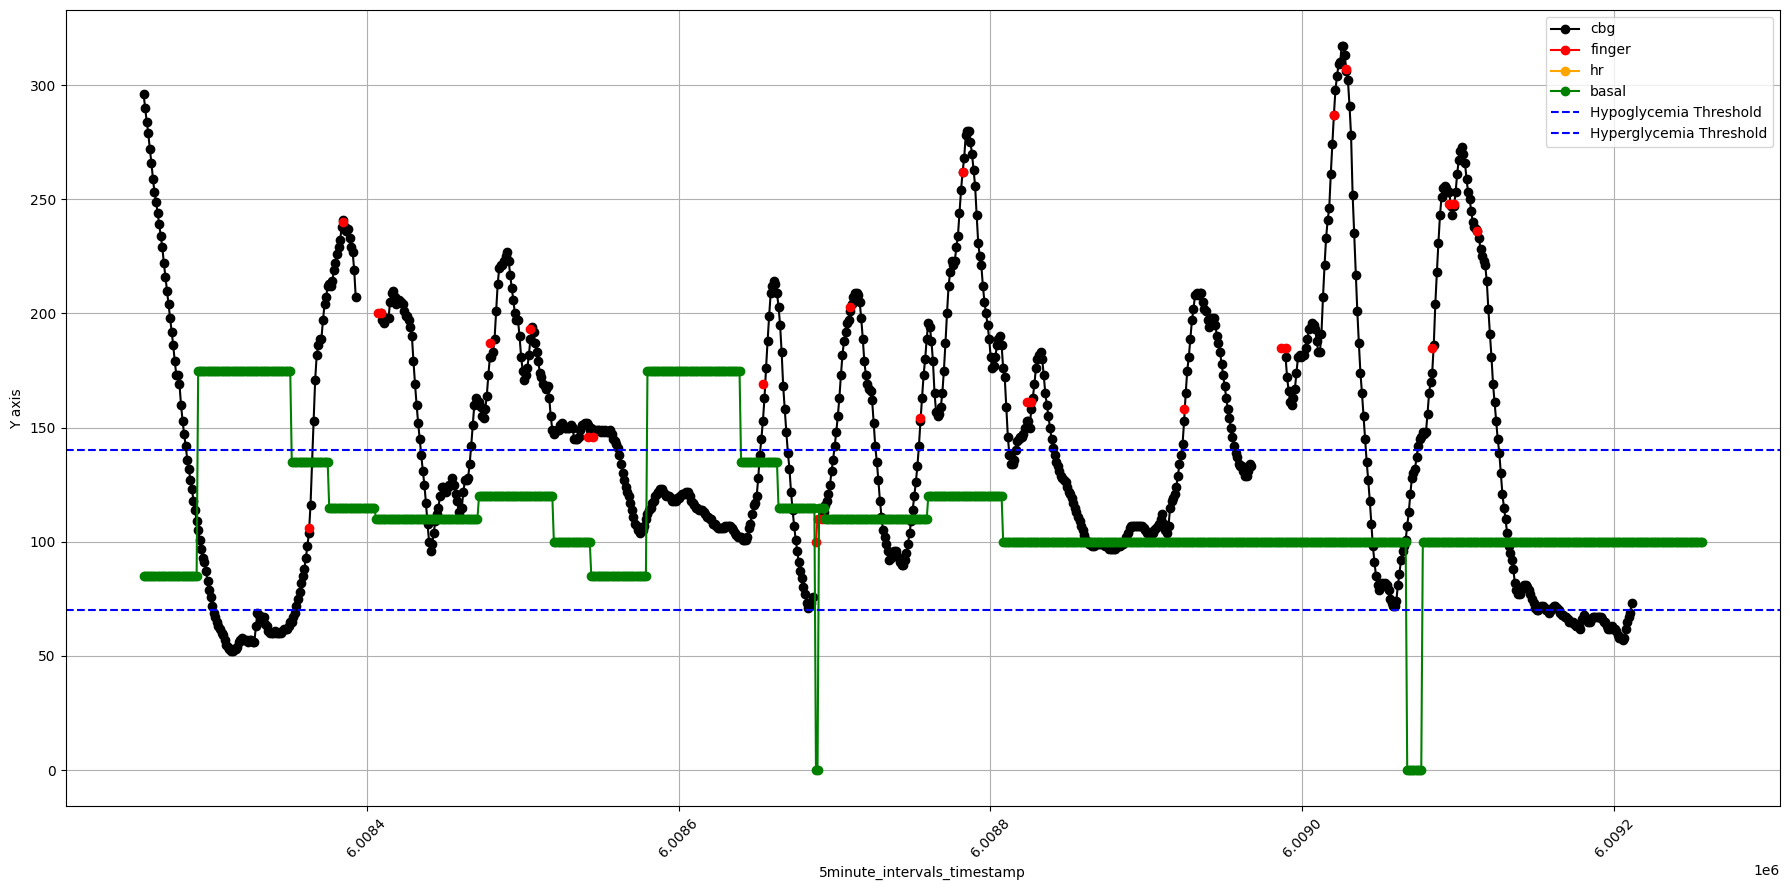

Patient:  584-ws-testing_processed.csv


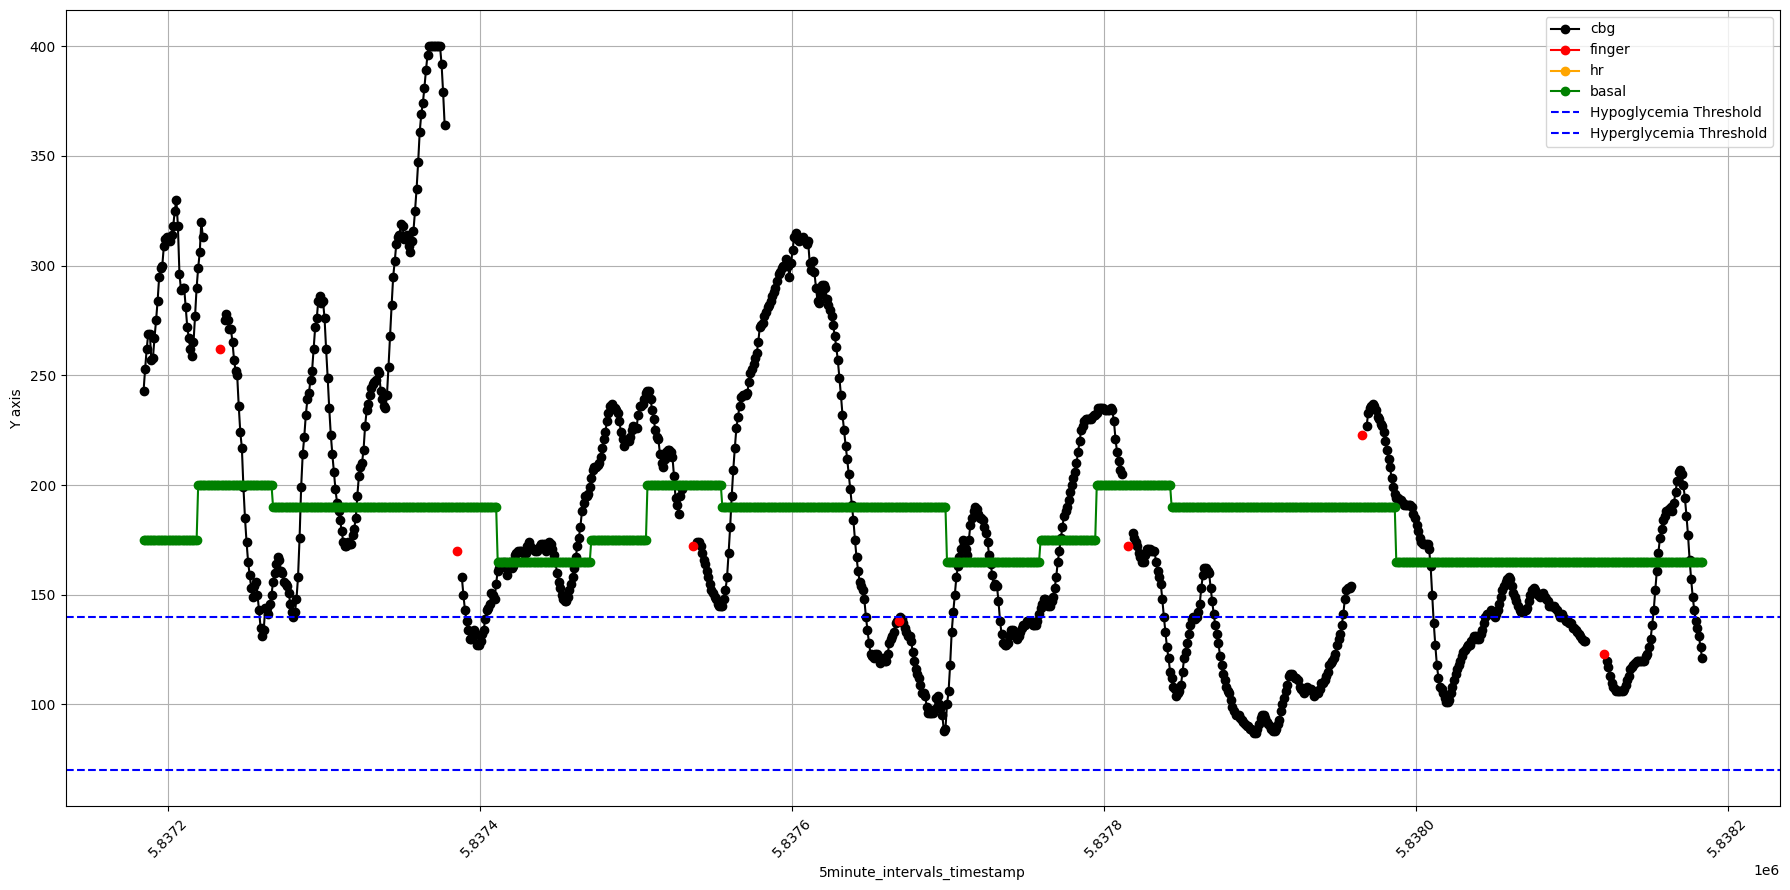

Patient:  596-ws-testing_processed.csv


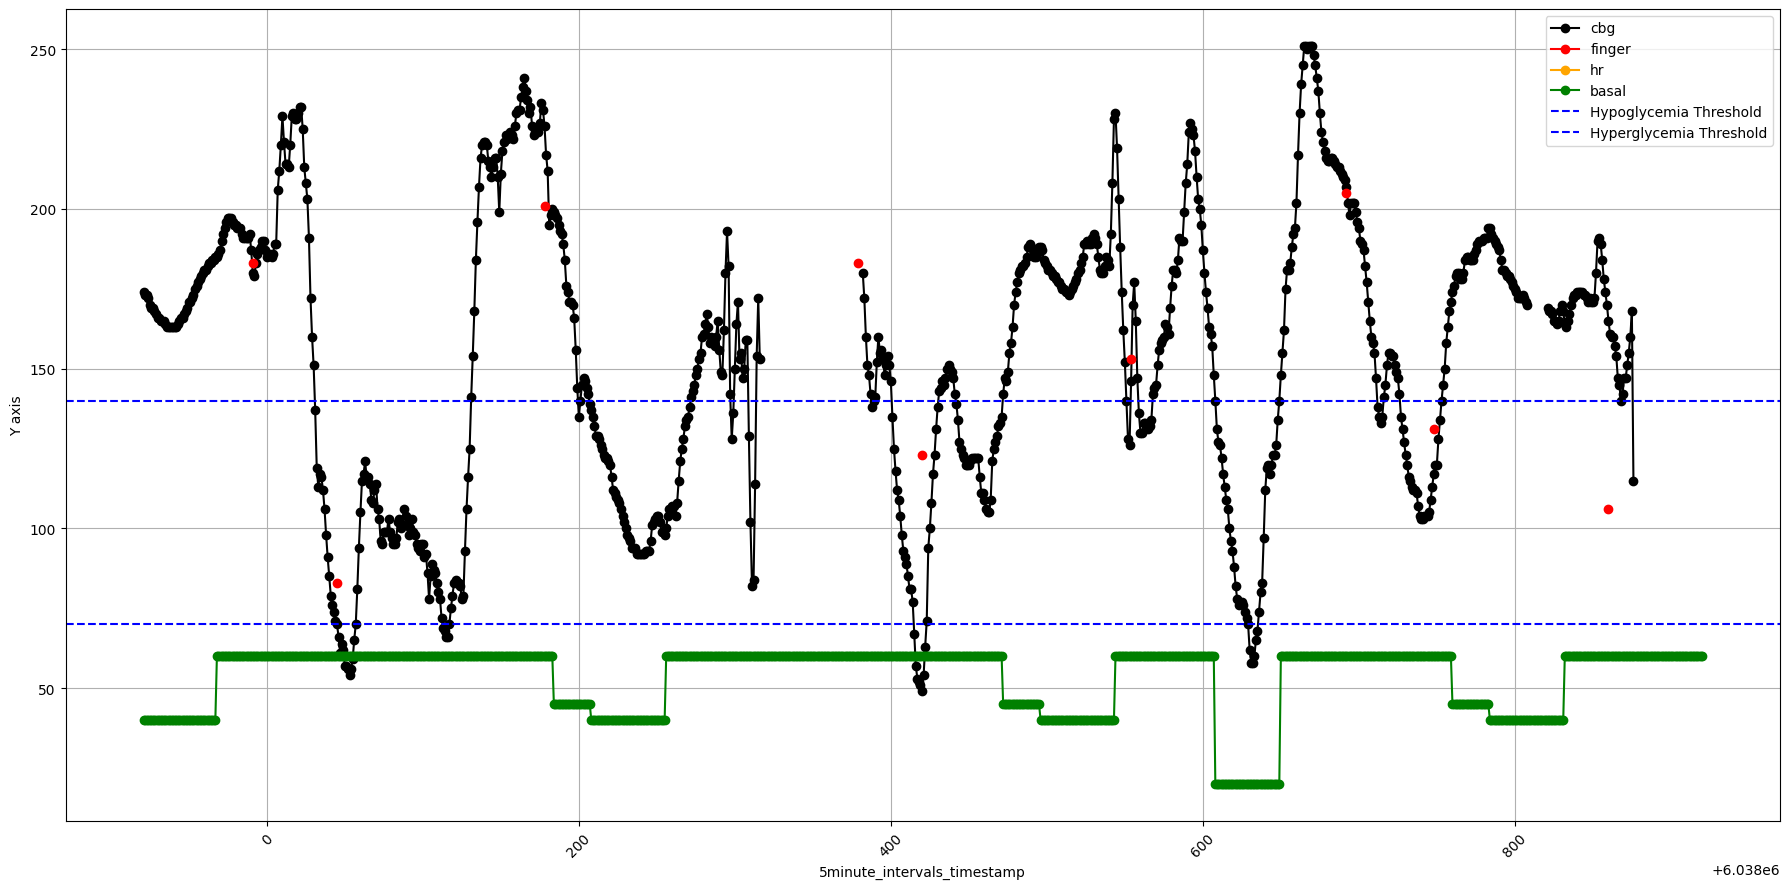

In [42]:
# Displaying all 24 plots:

# Create a dictionary
data_dict = {
    'train_set_2018': train_set_2018,
    'test_set_2018': test_set_2018,
    'train_set_2020': train_set_2020,
    'test_set_2020': test_set_2020,
}

for name, data in data_dict.items():
    print(f"Data: {name}")
    for index, value in enumerate(data):
        
        # not super pretty but it works:
        if name == 'train_set_2018':
            print("Patient: ", names_train_2018[index])
        elif name == 'test_set_2018':
            print("Patient: ", names_test_2018[index])
        elif name == 'train_set_2020':
            print("Patient: ", names_train_2020[index])
        else:
            print("Patient: ", names_test_2020[index])
                
        # Actual ploting of each of the 24 plots
        filtered_df = data[index].head(1000)

        # Plot lines
        plt.figure(figsize=(18, 9))
        plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['cbg'], marker='o', linestyle='-', color='black', label='cbg')
        plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['finger'], marker='o', linestyle='-', color='red', label='finger')
        plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['hr'], marker='o', linestyle='-', color='orange', label='hr')
        
        #TODO ADD bolus data to plot 
        
        # I multipled the basal by 100 just so its easier to see in plot
        plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['basal']*100, marker='o', linestyle='-', color='green', label='basal')
        
        # Variables that we can still plot and see what happens etc. -> hr, gsr, carbInput, bolus
        # What I think they mean: hr>heart rate, gsr>Galvanic skin response, carbInput -> carb in grams?, 
        # bolus> Insulin delivered to the patient, typically before a meal or when the patient is hyperglycemic.
        
        # Horizontal line representing for hyper- and hypoglycemia, maybe it helps us see 
        hypoglycemia_threshold = 70  # Not 100% sure about the value 
        plt.axhline(y=hypoglycemia_threshold, color='blue', linestyle='--', label='Hypoglycemia Threshold')
        hyperglycemia_threshold = 140 # Not 100% sure about the value 
        plt.axhline(y=hyperglycemia_threshold, color='blue', linestyle='--', label='Hyperglycemia Threshold')
        
        plt.xlabel('5minute_intervals_timestamp')
        plt.ylabel('Y axis')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [9]:
# Displaying all 24 plots:

# Create a dictionary
data_dict = {
    'train_set_2018': train_set_2018,
    'test_set_2018': test_set_2018,
    'train_set_2020': train_set_2020,
    'test_set_2020': test_set_2020,
}

for name, data in data_dict.items():
    print(f"Data: {name}")
    for index, value in enumerate(data):
        print("Index: " +str(index))
        print("Value: " +str(value))
        
        # not super pretty but it works:
        if name == 'train_set_2018':
            print("Patient: ", names_train_2018[index])
        elif name == 'test_set_2018':
            print("Patient: ", names_test_2018[index])
        elif name == 'train_set_2020':
            print("Patient: ", names_train_2020[index])
        else:
            print("Patient: ", names_test_2020[index])
                
#         # Actual ploting of each of the 24 plots
#         filtered_df = data[index].head(1000)

#         # Plot lines
#         plt.figure(figsize=(18, 9))
#         plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['cbg'], marker='o', linestyle='-', color='black', label='cbg')
#         plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['finger'], marker='o', linestyle='-', color='red', label='finger')
#         plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['hr'], marker='o', linestyle='-', color='orange', label='hr')
        
#         #TODO ADD bolus data to plot 
        
#         # I multipled the basal by 100 just so its easier to see in plot
#         plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['basal']*100, marker='o', linestyle='-', color='green', label='basal')
        
#         # Variables that we can still plot and see what happens etc. -> hr, gsr, carbInput, bolus
#         # What I think they mean: hr>heart rate, gsr>Galvanic skin response, carbInput -> carb in grams?, 
#         # bolus> Insulin delivered to the patient, typically before a meal or when the patient is hyperglycemic.
        
#         # Horizontal line representing for hyper- and hypoglycemia, maybe it helps us see 
#         hypoglycemia_threshold = 70  # Not 100% sure about the value 
#         plt.axhline(y=hypoglycemia_threshold, color='blue', linestyle='--', label='Hypoglycemia Threshold')
#         hyperglycemia_threshold = 140 # Not 100% sure about the value 
#         plt.axhline(y=hyperglycemia_threshold, color='blue', linestyle='--', label='Hyperglycemia Threshold')
        
#         plt.xlabel('5minute_intervals_timestamp')
#         plt.ylabel('Y axis')
#         plt.xticks(rotation=45)
#         plt.legend()
#         plt.grid(True)
#         plt.tight_layout()
#         plt.show()

Data: train_set_2018
Index: 0
Value:        5minute_intervals_timestamp  missing_cbg    cbg  finger  basal    hr  \
0                     5.462799e+06          0.0  101.0     NaN    NaN   NaN   
1                     5.462800e+06          0.0   98.0     NaN    NaN   NaN   
2                     5.462801e+06          0.0  104.0     NaN    NaN   NaN   
3                     5.462802e+06          0.0  112.0     NaN    NaN   NaN   
4                     5.462803e+06          0.0  120.0     NaN    NaN   NaN   
...                            ...          ...    ...     ...    ...   ...   
12075                 5.474876e+06          0.0  161.0     NaN   0.83  58.0   
12076                 5.474877e+06          0.0  164.0     NaN   0.83  58.0   
12077                 5.474878e+06          0.0  168.0     NaN   0.83  58.0   
12078                 5.474879e+06          0.0  172.0     NaN   0.83  57.0   
12079                 5.474880e+06          0.0  176.0     NaN   0.83  58.0   

            gs

In [10]:
train_set_2018

[       5minute_intervals_timestamp  missing_cbg    cbg  finger  basal    hr  \
 0                     5.462799e+06          0.0  101.0     NaN    NaN   NaN   
 1                     5.462800e+06          0.0   98.0     NaN    NaN   NaN   
 2                     5.462801e+06          0.0  104.0     NaN    NaN   NaN   
 3                     5.462802e+06          0.0  112.0     NaN    NaN   NaN   
 4                     5.462803e+06          0.0  120.0     NaN    NaN   NaN   
 ...                            ...          ...    ...     ...    ...   ...   
 12075                 5.474876e+06          0.0  161.0     NaN   0.83  58.0   
 12076                 5.474877e+06          0.0  164.0     NaN   0.83  58.0   
 12077                 5.474878e+06          0.0  168.0     NaN   0.83  58.0   
 12078                 5.474879e+06          0.0  172.0     NaN   0.83  57.0   
 12079                 5.474880e+06          0.0  176.0     NaN   0.83  58.0   
 
             gsr  carbInput  bolus  
 

In [12]:
index_patient_570 = 2
print("Patient: ", names_train_2018[index_patient_570])

Patient:  570-ws-training_processed.csv


In [13]:
train_set_2018[index_patient_570]

5minute_intervals_timestamp  missing_cbg    cbg  finger  basal    hr  \
0                     5.462982e+06          0.0  101.0     NaN    NaN   NaN   
1                     5.462983e+06          0.0  100.0     NaN    NaN   NaN   
2                     5.462984e+06          0.0  100.0     NaN    NaN   NaN   
3                     5.462985e+06          0.0   99.0     NaN    NaN   NaN   
4                     5.462986e+06          0.0   98.0     NaN    NaN   NaN   
...                            ...          ...    ...     ...    ...   ...   
11606                 5.474589e+06          0.0  113.0     NaN   0.88  82.0   
11607                 5.474590e+06          0.0  118.0     NaN   0.88  82.0   
11608                 5.474591e+06          0.0  120.0     NaN   0.88  83.0   
11609                 5.474592e+06          0.0  123.0     NaN   0.88  85.0   
11610                 5.474593e+06          0.0  128.0     NaN   0.88   NaN   

            gsr  carbInput  bolus  
0           NaN        NaN    NaN  
1           NaN        NaN    NaN  
2           NaN        NaN    NaN  
3           NaN        NaN    NaN  
4           NaN        NaN    NaN  
...         ...        ...    ...  
11606  0.000054        NaN    NaN  
11607  0.000056        NaN    NaN  
11608  0.000057        NaN    NaN  
11609  0.000058        NaN    NaN  
11610  0.000058        NaN    NaN  

[11611 rows x 9 columns]

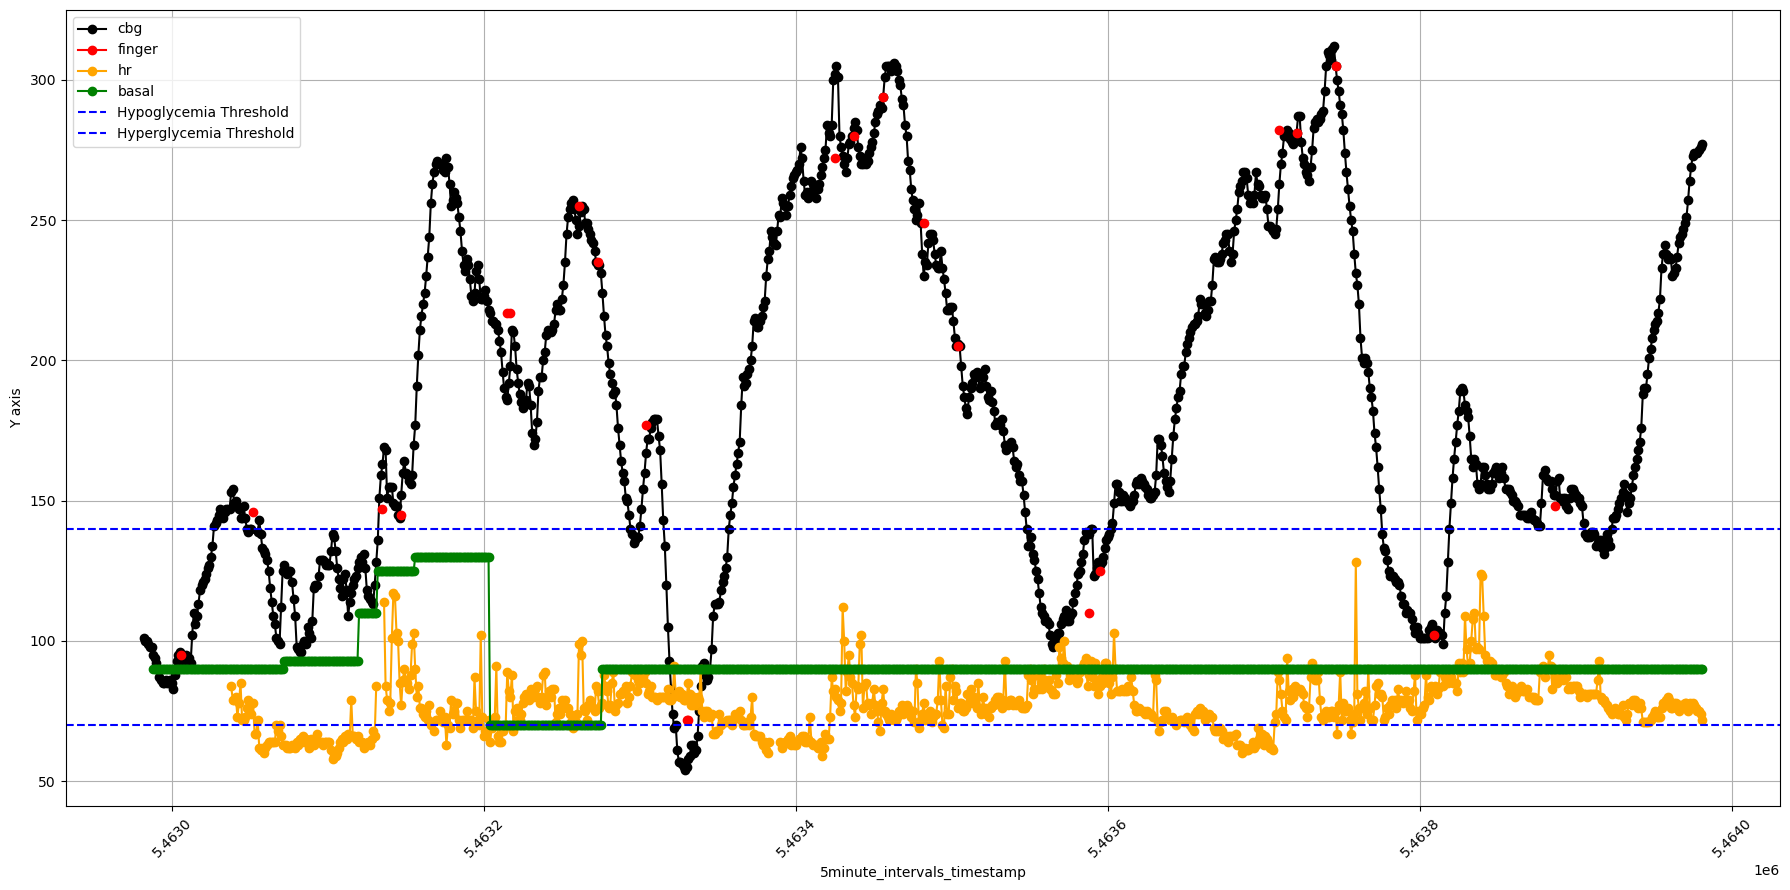

In [14]:
# Actual ploting of each of the 24 plots
filtered_df = train_set_2018[index_patient_570].head(1000)

# Plot lines
plt.figure(figsize=(18, 9))
plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['cbg'], marker='o', linestyle='-', color='black', label='cbg')
plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['finger'], marker='o', linestyle='-', color='red', label='finger')
plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['hr'], marker='o', linestyle='-', color='orange', label='hr')

#TODO ADD bolus data to plot 

# I multipled the basal by 100 just so its easier to see in plot
plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['basal']*100, marker='o', linestyle='-', color='green', label='basal')

# Variables that we can still plot and see what happens etc. -> hr, gsr, carbInput, bolus
# What I think they mean: hr>heart rate, gsr>Galvanic skin response, carbInput -> carb in grams?, 
# bolus> Insulin delivered to the patient, typically before a meal or when the patient is hyperglycemic.

# Horizontal line representing for hyper- and hypoglycemia, maybe it helps us see 
hypoglycemia_threshold = 70  # Not 100% sure about the value 
plt.axhline(y=hypoglycemia_threshold, color='blue', linestyle='--', label='Hypoglycemia Threshold')
hyperglycemia_threshold = 140 # Not 100% sure about the value 
plt.axhline(y=hyperglycemia_threshold, color='blue', linestyle='--', label='Hyperglycemia Threshold')

plt.xlabel('5minute_intervals_timestamp')
plt.ylabel('Y axis')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
total_time = train_set_2018[index_patient_570].shape
total_time

(11611, 9)

In [18]:
total_time = train_set_2018[index_patient_570].shape[0]
(total_time-1)*5/60/24/7

5.758928571428571

In [23]:
total_time = test_set_2018[index_patient_570].shape[0]
total_time

2879

In [24]:
total_time = test_set_2018[index_patient_570].shape[0]
(total_time-1)*5/60/24/7

1.4275793650793651

In [25]:
5.7589+1.4275

7.1864

In [28]:
data = train_set_2018[index_patient_570]['finger']
data

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
11606   NaN
11607   NaN
11608   NaN
11609   NaN
11610   NaN
Name: finger, Length: 11611, dtype: float64

In [38]:
~np.isnan(data)

0        False
1        False
2        False
3        False
4        False
         ...  
11606    False
11607    False
11608    False
11609    False
11610    False
Name: finger, Length: 11611, dtype: bool

In [45]:
SMBG_only = data[~np.isnan(data)]
SMBG_only

24        95.0
70       146.0
153      147.0
165      145.0
233      217.0
         ...  
11423    247.0
11480    154.0
11486    161.0
11547    166.0
11564    169.0
Name: finger, Length: 240, dtype: float64

In [46]:
SMBG_only.index


Int64Index([   24,    70,   153,   165,   233,   235,   279,   291,   322,
              348,
            ...
            11144, 11204, 11210, 11286, 11418, 11423, 11480, 11486, 11547,
            11564],
           dtype='int64', length=240)

In [48]:
non_nan_indices = np.array(data[~np.isnan(data)].index)
non_nan_indices

array([   24,    70,   153,   165,   233,   235,   279,   291,   322,
         348,   349,   443,   455,   474,   500,   522,   606,   613,
         728,   739,   764,   827,   905,  1047,  1066,  1156,  1197,
        1216,  1344,  1363,  1480,  1497,  1592,  1605,  1679,  1716,
        1733,  1779,  1780,  1880,  1892,  1926,  1975,  1985,  2007,
        2038,  2171,  2184,  2245,  2297,  2308,  2327,  2456,  2468,
        2536,  2614,  2615,  2771,  2774,  2832,  2833,  2904,  2958,
        3071,  3084,  3205,  3212,  3367,  3369,  3419,  3509,  3510,
        3633,  3634,  3650,  3741,  3773,  3776,  3896,  3909,  3981,
        3995,  4033,  4067,  4183,  4216,  4265,  4336,  4474,  4484,
        4549,  4594,  4642,  4661,  4781,  4788,  4854,  4856,  4918,
        4922,  4993,  5101,  5107,  5212,  5213,  5246,  5380,  5392,
        5513,  5522,  5661,  5665,  5743,  5744,  5780,  5816,  5912,
        5924,  5989,  5991,  6038,  6081,  6223,  6232,  6286,  6288,
        6351,  6363,

In [35]:
import numpy as np 

# Find indices where the values are not NaN
non_nan_indices = np.where(~np.isnan(data))
non_nan_indices


(array([   24,    70,   153,   165,   233,   235,   279,   291,   322,
          348,   349,   443,   455,   474,   500,   522,   606,   613,
          728,   739,   764,   827,   905,  1047,  1066,  1156,  1197,
         1216,  1344,  1363,  1480,  1497,  1592,  1605,  1679,  1716,
         1733,  1779,  1780,  1880,  1892,  1926,  1975,  1985,  2007,
         2038,  2171,  2184,  2245,  2297,  2308,  2327,  2456,  2468,
         2536,  2614,  2615,  2771,  2774,  2832,  2833,  2904,  2958,
         3071,  3084,  3205,  3212,  3367,  3369,  3419,  3509,  3510,
         3633,  3634,  3650,  3741,  3773,  3776,  3896,  3909,  3981,
         3995,  4033,  4067,  4183,  4216,  4265,  4336,  4474,  4484,
         4549,  4594,  4642,  4661,  4781,  4788,  4854,  4856,  4918,
         4922,  4993,  5101,  5107,  5212,  5213,  5246,  5380,  5392,
         5513,  5522,  5661,  5665,  5743,  5744,  5780,  5816,  5912,
         5924,  5989,  5991,  6038,  6081,  6223,  6232,  6286,  6288,
      

In [49]:
# Calculate the differences between consecutive non-NaN indices
differences = np.diff(non_nan_indices)

# Compute the average difference
average_distance = differences.mean()

print(f"Average distance between SMBG measurements: {average_distance}")

Average distance between SMBG measurements: 48.28451882845188


In [50]:
average_distance*5/60

4.023709902370991

In [54]:
import math
math.ceil(average_distance)

49

In [55]:
train_set_2018[index_patient_570]['missing_cbg']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
11606    0.0
11607    0.0
11608    0.0
11609    0.0
11610    0.0
Name: missing_cbg, Length: 11611, dtype: float64

In [62]:
(train_set_2018[index_patient_570]['missing_cbg'][train_set_2018[index_patient_570]['missing_cbg']==1])

70       1.0
71       1.0
72       1.0
1705     1.0
1706     1.0
        ... 
11134    1.0
11135    1.0
11136    1.0
11137    1.0
11138    1.0
Name: missing_cbg, Length: 629, dtype: float64

In [88]:
indices_missing_cbg = (train_set_2018[index_patient_570]['missing_cbg'][train_set_2018[index_patient_570]['missing_cbg']==1]).index
indices_missing_cbg

Int64Index([   70,    71,    72,  1705,  1706,  1707,  1708,  1709,  1710,
             1711,
            ...
            11129, 11130, 11131, 11132, 11133, 11134, 11135, 11136, 11137,
            11138],
           dtype='int64', length=629)

In [103]:
np.array(indices_missing_cbg)

array([   70,    71,    72,  1705,  1706,  1707,  1708,  1709,  1710,
        1711,  1712,  1713,  1714,  1715,  1716,  1717,  1718,  1719,
        1720,  1721,  1722,  1723,  1724,  1725,  1726,  1727,  1728,
        1729,  1730,  1731,  1732,  1733,  1734,  2758,  2759,  2760,
        2761,  2762,  2763,  2764,  2765,  2766,  2767,  2768,  2769,
        2770,  2771,  2772,  2931,  2932,  2933,  2934,  2935,  2936,
        2937,  2938,  2939,  2940,  2941,  2942,  2943,  2944,  2945,
        2946,  2947,  2948,  2949,  2950,  2951,  2952,  2953,  2954,
        2955,  2956,  2957,  2958,  2959,  3030,  3031,  3032,  3033,
        3034,  3035,  3036,  3037,  3038,  3039,  3040,  3041,  3042,
        3043,  3044,  3045,  3046,  3047,  3048,  3049,  3050,  3051,
        3052,  3053,  3054,  3055,  3056,  3057,  3058,  3059,  3060,
        3061,  3062,  3063,  3064,  3065,  3066,  3067,  3068,  3069,
        3070,  3071,  3072,  3349,  3350,  3351,  3352,  3353,  3354,
        3355,  3356,

In [58]:
np.sum(train_set_2018[index_patient_570]['missing_cbg']==1)

629

In [89]:
indices_missing_cbg[0]

70

In [96]:
diffs = np.diff(indices_missing_cbg)

# Find where the difference between consecutive indices is greater than 1
breaks = np.where(diffs > 1)[0]
breaks

array([  2,  32,  47,  76, 119, 139, 150, 151, 181, 231, 237, 268, 278,
       308, 452, 511, 526, 568, 602], dtype=int64)

In [102]:
start_stops = [indices_missing_cbg[0]]
print(type(indices_missing_cbg[0]))
print(type(start_stops))
for i in breaks:
    start_stops.append(indices_missing_cbg[i])
    start_stops.append(indices_missing_cbg[i+1])

start_stops.append(indices_missing_cbg[-1])

print(start_stops)
print(type(start_stops))

<class 'numpy.int64'>
<class 'list'>
[70, 72, 1705, 1734, 2758, 2772, 2931, 2959, 3030, 3072, 3349, 3368, 4327, 4337, 4366, 4366, 4633, 4662, 4733, 4782, 5657, 5662, 6322, 6352, 7381, 7390, 8076, 8105, 8952, 9095, 9322, 9380, 9522, 9536, 10663, 10704, 10775, 10808, 11113, 11138]
<class 'list'>


In [71]:
indices_missing_cbg[breaks]

array([   72,  1734,  2772,  2959,  3072,  3368,  4337,  4366,  4662,
        4782,  5662,  6352,  7390,  8105,  9095,  9380,  9536, 10704,
       10808], dtype=int64)

In [104]:
len(train_set_2018[index_patient_570])

11611

In [106]:
train_set_2018[index_patient_570].shape[0]

11611

In [108]:
train_set_2018[index_patient_570]['cbg'].shape[0]

11611

In [128]:
# Take only available data 
start_stops = np.array(start_stops)
start_stops.shape[0]

40

In [132]:
import math
data = train_set_2018[index_patient_570]['cbg']
print(data.shape)
window_size = math.ceil(average_distance)
print(f"Chosen window size: {window_size}")
cgm_windows = []
i = 0
missing_index = 0

print((data.shape[0]-window_size))
while(i < (data.shape[0]-window_size)):
    if missing_index < start_stops.shape[0]-1:
        if(i < (start_stops[missing_index]-window_size)):
            cgm_windows.append(data[i:i+window_size])
            i = i+window_size
        else:
            i = start_stops[missing_index+1]+1
            if (missing_index+1) < start_stops.shape[0]-1:
                missing_index+=2
            else: 
                missing_index+=1
    else:
        cgm_windows.append(data[i:i+window_size])
        i = i+window_size
            
    
#cgm_windows
test = np.array(cgm_windows)
test.shape

(11611,)
Chosen window size: 49
11562


(212, 49)

In [136]:
train_set_2018[index_patient_570]['cbg'].shape[0]-np.sum(train_set_2018[index_patient_570]['missing_cbg']==1)

10982

In [137]:
(train_set_2018[index_patient_570]['cbg'].shape[0]-np.sum(train_set_2018[index_patient_570]['missing_cbg']==1))/window_size

224.12244897959184

In [135]:
test

array([[101., 100., 100., ..., 142., 143., 145.],
       [139., 143., 138., ..., 127., 132., 138.],
       [137., 132., 126., ..., 160., 159., 157.],
       ...,
       [250., 253., 250., ..., 159., 162., 166.],
       [167., 158., 159., ..., 117., 116., 117.],
       [120., 123., 125., ..., 122., 113., 104.]])

In [122]:
test[0]

array([101., 100., 100.,  99.,  98.,  98.,  95.,  94.,  92.,  90.,  87.,
        86.,  85.,  85.,  86.,  85.,  85.,  86.,  85.,  83.,  88.,  93.,
        95.,  96.,  93.,  93.,  94.,  95.,  94.,  94.,  92., 102., 110.,
       106., 109., 113., 118., 120., 121., 122., 124., 126., 127., 130.,
       134., 141., 142., 143., 145.])

In [142]:
import numpy as np 
import math

data = train_set_2018[index_patient_570]
## All together 
non_nan_indices = np.array(data['finger'][~np.isnan(data['finger'])].index)
# Calculate the differences between consecutive non-NaN indices
differences = np.diff(non_nan_indices)
# Compute the average difference
average_distance = differences.mean()
print(f"Average distance between SMBG measurements: {average_distance}")
print(f"Average distance between SMBG measurements in hours: {round(average_distance*5/60)}")

############ Generate windows


#### Check for missing values
indices_missing_cbg = (data['missing_cbg'][data['missing_cbg']==1]).index
print(indices_missing_cbg)
print(f"Number of missing CGM values: {np.sum(data['missing_cbg']==1)}")

diffs = np.diff(indices_missing_cbg)
# Find where the difference between consecutive indices is greater than 1
breaks = np.where(diffs > 1)[0]
print(breaks)
                                       
# Save indices of starts and stops of the missing value windows                                      
start_stops = [indices_missing_cbg[0]]
print(type(indices_missing_cbg[0]))
print(type(start_stops))
for i in breaks:
    start_stops.append(indices_missing_cbg[i])
    start_stops.append(indices_missing_cbg[i+1])

start_stops.append(indices_missing_cbg[-1])

print(start_stops)
                                       
start_stops = np.array(start_stops)

# Save windows with the wanted size of the CGM data (excluding missing values)
print(data['cbg'].shape)
window_size = math.ceil(average_distance)
print(f"Chosen window size: {window_size}")
cgm_windows = []
i = 0
missing_index = 0

print((data['cbg'].shape[0]-window_size))
while(i < (data['cbg'].shape[0]-window_size)):
    if missing_index < start_stops.shape[0]-1:
        if(i < (start_stops[missing_index]-window_size)):
            cgm_windows.append(data['cbg'][i:i+window_size])
            i = i+window_size
        else:
            i = start_stops[missing_index+1]+1
            if (missing_index+1) < start_stops.shape[0]-1:
                missing_index+=2
            else: 
                missing_index+=1
    else:
        cgm_windows.append(data['cbg'][i:i+window_size])
        i = i+window_size
            
    

test = np.array(cgm_windows)
test.shape

Average distance between SMBG measurements: 48.28451882845188
Average distance between SMBG measurements in hours: 4
Int64Index([   70,    71,    72,  1705,  1706,  1707,  1708,  1709,  1710,
             1711,
            ...
            11129, 11130, 11131, 11132, 11133, 11134, 11135, 11136, 11137,
            11138],
           dtype='int64', length=629)
Number of missing CGM values: 629
[  2  32  47  76 119 139 150 151 181 231 237 268 278 308 452 511 526 568
 602]
<class 'numpy.int64'>
<class 'list'>
[70, 72, 1705, 1734, 2758, 2772, 2931, 2959, 3030, 3072, 3349, 3368, 4327, 4337, 4366, 4366, 4633, 4662, 4733, 4782, 5657, 5662, 6322, 6352, 7381, 7390, 8076, 8105, 8952, 9095, 9322, 9380, 9522, 9536, 10663, 10704, 10775, 10808, 11113, 11138]
(11611,)
Chosen window size: 49
11562


(212, 49)

In [ ]:
test